In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 203 data

### Reading the files and extracting relevant information:

In [3]:
plant = "F"
xls_files = {}

xls = pd.ExcelFile(
    f"../../../data/raw/204/EMBRAPII hubIC IACC CIMENTO_{plant}.xlsx",
    engine="openpyxl",
)
xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  F ['INSTRUÇÕES', '55', '75', '14', '91', '65']


<IPython.core.display.Javascript object>

In [5]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant

[('F', '55', array(['CPVARI'], dtype=object)),
 ('F', '75', array(['CPIIE32'], dtype=object)),
 ('F', '14', array(['CPIIF32', ''], dtype=object)),
 ('F', '91', array(['CPIV32'], dtype=object)),
 ('F', '65', array(['CPVARIRS'], dtype=object))]

<IPython.core.display.Javascript object>

In [7]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'CPVARI': 1, 'CPIIE32': 1, 'CPIIF32': 1, 'CPIV32': 1, 'CPVARIRS': 1})

<IPython.core.display.Javascript object>

In [8]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [9]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [10]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2699 entries, 0 to 2698
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   (Cidade, Unnamed: 1_level_2)                 2688 non-null   object        
 1   (Data, Produção)                             2688 non-null   datetime64[ns]
 2   (Horário, Produção)                          0 non-null      float64       
 3   (Data, Medida)                               0 non-null      float64       
 4   (Horário, Medida)                            0 non-null      float64       
 5   (Tipo de cimento, Unnamed: 6_level_2)        2688 non-null   object        
 6   (Classe de resistência, Unnamed: 7_level_2)  0 non-null      float64       
 7   (Obs., Unnamed: 8_level_2)                   0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 168.8+ KB


<IPython.core.display.Javascript object>

In [11]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2699 entries, 0 to 2698
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      float

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2699 entries, 0 to 2698
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  0 non-null      float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 147.7 KB


<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2699 entries, 0 to 2698
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                2672 non-null   float64
 1   MgO                2672 non-null   float64
 2   Na2O               2672 non-null   float64
 3   Al2O3              2672 non-null   float64
 4   SiO2               2672 non-null   float64
 5   SO3                2672 non-null   float64
 6   K2O                2672 non-null   float64
 7   TiO2               0 non-null      float64
 8   Fe2O3              2672 non-null   float64
 9   Perda ao fogo      2675 non-null   float64
 10  Resíduo insolúvel  219 non-null    float64
 11  Obs.               999 non-null    float64
dtypes: float64(12)
memory usage: 253.2 KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2699 entries, 0 to 2698
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          0 non-null      float64
 1   C2S total          0 non-null      float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               0 non-null      float64
 6   C3A                0 non-null      float64
 7   C3A cubic          0 non-null      float64
 8   C3A orto           0 non-null      float64
 9   CaO livre          0 non-null      float64
 10  Portlandita        0 non-null      float64
 11  Periclasio         0 non-null      float64
 12  Arcanita           0 non-null      float64
 13  Aphthalita         0 non-null      float64
 14  Langbeinita        0 non-null      float64
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          0 non

<IPython.core.display.Javascript object>

In [15]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [16]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2699 entries, 0 to 2698
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            2688 non-null   float64
 1   (Unnamed: 137_level_1, #200)              2688 non-null   float64
 2   (Unnamed: 138_level_1, #325)              2687 non-null   float64
 3   (Unnamed: 139_level_1, #400)              0 non-null      float64
 4   (Unnamed: 140_level_1, Massa específica)  0 non-null      float64
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(6)
memory usage: 126.6 KB


<IPython.core.display.Javascript object>

In [17]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2699 entries, 0 to 2698
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           2688 non-null   float64
 1   (Tempo de pega, Fim)              2688 non-null   float64
 2   (Resistência à compressão, 1 d)   1793 non-null   float64
 3   (Resistência à compressão, 3 d)   2680 non-null   float64
 4   (Resistência à compressão, 7 d)   2672 non-null   float64
 5   (Resistência à compressão, 28 d)  2622 non-null   float64
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(7)
memory usage: 147.7 KB


<IPython.core.display.Javascript object>

In [18]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [19]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2699 entries, 0 to 2698
Data columns (total 34 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, Unnamed: 0_level_2)  2699 non-null   object 
 1   (Cidade, Unnamed: 1_level_2)                                  2688 non-null   object 
 2   (Data, Produção)                                              2688 non-null   object 
 3   (Horário, Produção)                                           0 non-null      object 
 4   (Data, Medida)                                                0 non-null      object 
 5   (Horário, Medida)                                             0 non-null      object 
 6   (Tipo de cimento, Unnamed: 6_level_2)                         2688 non-null   object 
 7   (Classe de resistência, Unnamed: 7_level_2)                   0 non-n

<IPython.core.display.Javascript object>

In [21]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    # ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",  # Arrumar!
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Final setting time",
    ("Tempo de pega", "Fim"): "Initial setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

# # Preprocessing
df["Cement_Type"] = df["Cement_Type"].replace("Fibro", "Fibrocimento")


df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [22]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [23]:
NUMERIC_COLUMNS = [
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

<IPython.core.display.Javascript object>

# EDA

In [24]:
df.shape

(2687, 26)

<IPython.core.display.Javascript object>

In [25]:
df.head()

Plant        City       Date    CaO   MgO  Na2O  Al2O3   SiO2   SO3   K2O  \
0     F  Ijaci - MG 2020-01-06  62.74  3.05  0.28   4.53  19.14  3.75  1.00   
1     F  Ijaci - MG 2020-01-09  62.44  3.18  0.28   4.53  18.89  3.73  1.00   
2     F  Ijaci - MG 2020-01-12  61.85  3.18  0.27   4.49  18.40  3.90  0.97   
3     F  Ijaci - MG 2020-01-14  62.03  3.33  0.30   4.58  18.79  3.99  0.98   
4     F  Ijaci - MG 2020-01-15  61.78  3.29  0.28   4.42  18.32  4.07  0.97   

   ...  #325  #400  Specific Gravity  Final setting time  \
0  ...  1.55   NaN               NaN               155.0   
1  ...  1.10   NaN               NaN               160.0   
2  ...  0.83   NaN               NaN               150.0   
3  ...  1.16   NaN               NaN               135.0   
4  ...  1.37   NaN               NaN               165.0   

   Initial setting time    CS1    CS3   CS7  CS28  Cement_Type  
0                 210.0  29.01  37.85  41.2  49.4      CPV ARI  
1                 210.0  28.00  37.93  41.0  50.0      CPV ARI  
2                 270.0  27.10  37.30  41.8  48.8      CPV ARI  
3                 220.0  27.10  37.35  41.2  49.6      CPV ARI  
4                 220.0  28.20  37.83  41.0  49.6      CPV ARI  

[5 rows x 26 columns]

<IPython.core.display.Javascript object>

In [26]:
df.tail()

Plant        City       Date    CaO   MgO  Na2O  Al2O3   SiO2   SO3  \
2682     F  Ijaci - MG 2023-07-23  58.55  3.10  0.18   5.42  21.92  4.04   
2683     F  Ijaci - MG 2023-07-25  59.62  2.96  0.13   5.29  21.24  4.10   
2684     F  Ijaci - MG 2023-07-26  59.00  3.06  0.87   5.35  21.38  4.20   
2685     F  Ijaci - MG 2023-07-27    NaN   NaN   NaN    NaN    NaN   NaN   
2686     F  Ijaci - MG 2023-07-30  58.53  3.07  0.10   5.47  21.62  4.14   

       K2O  ...  #325  #400  Specific Gravity  Final setting time  \
2682  0.87  ...  1.68   NaN               NaN               205.0   
2683  0.86  ...  1.72   NaN               NaN               205.0   
2684  0.87  ...  2.01   NaN               NaN               200.0   
2685   NaN  ...  2.19   NaN               NaN               185.0   
2686  0.84  ...  1.95   NaN               NaN               200.0   

      Initial setting time   CS1   CS3   CS7  CS28  Cement_Type  
2682                 270.0  18.0  32.2  38.1   NaN   CPV ARI RS  
2683                 275.0  18.0  32.9   NaN   NaN   CPV ARI RS  
2684                 245.0  19.1  33.9   NaN   NaN   CPV ARI RS  
2685                 250.0  20.7  34.2   NaN   NaN   CPV ARI RS  
2686                 280.0   NaN   NaN   NaN   NaN   CPV ARI RS  

[5 rows x 26 columns]

<IPython.core.display.Javascript object>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plant                 2687 non-null   object        
 1   City                  2687 non-null   object        
 2   Date                  2687 non-null   datetime64[ns]
 3   CaO                   2671 non-null   float64       
 4   MgO                   2671 non-null   float64       
 5   Na2O                  2671 non-null   float64       
 6   Al2O3                 2671 non-null   float64       
 7   SiO2                  2671 non-null   float64       
 8   SO3                   2671 non-null   float64       
 9   K2O                   2671 non-null   float64       
 10  TiO2                  0 non-null      float64       
 11  Fe2O3                 2671 non-null   float64       
 12  Loss on Ignition      2674 non-null   float64       
 13  Insoluble Residue 

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [28]:
df.dtypes.value_counts()

float64           22
object             3
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [29]:
df.describe().transpose()

count                           mean  \
Date                    2687  2021-10-21 14:11:34.008187392   
CaO                   2671.0                      61.277851   
MgO                   2671.0                       2.926863   
Na2O                  2671.0                       0.223575   
Al2O3                 2671.0                       4.148963   
SiO2                  2671.0                      20.464511   
SO3                   2671.0                       3.465395   
K2O                   2671.0                       0.895414   
TiO2                     0.0                            NaN   
Fe2O3                 2671.0                       2.485545   
Loss on Ignition      2674.0                       5.427805   
Insoluble Residue      219.0                       0.068128   
Blaine                2687.0                    4812.850763   
#200                  2687.0                       0.685411   
#325                  2686.0                       4.118537   
#400                     0.0                            NaN   
Specific Gravity         0.0                            NaN   
Final setting time    2687.0                     192.860439   
Initial setting time  2687.0                     264.311128   
CS1                   1792.0                      25.396434   
CS3                   2679.0                      31.840788   
CS7                   2671.0                      36.596518   
CS28                  2621.0                      44.767531   

                                      min                  25%  \
Date                  2020-01-02 00:00:00  2020-12-18 12:00:00   
CaO                                  2.68                58.92   
MgO                                  0.69                 2.55   
Na2O                                  0.0                 0.18   
Al2O3                                0.12                 4.15   
SiO2                                  0.0                19.45   
SO3                                   0.0                 2.61   
K2O                                  0.12                 0.85   
TiO2                                  NaN                  NaN   
Fe2O3                                 0.0                 2.36   
Loss on Ignition                      0.0                 4.07   
Insoluble Residue                     0.0                  0.0   
Blaine                                0.0               4490.0   
#200                                  0.0                 0.14   
#325                                  0.0                 1.27   
#400                                  NaN                  NaN   
Specific Gravity                      NaN                  NaN   
Final setting time                    0.0                165.0   
Initial setting time                  0.0                240.0   
CS1                                  17.3                 21.6   
CS3                                  15.5                 23.8   
CS7                                  20.7                 28.9   
CS28                                 32.0                 36.1   

                                      50%                  75%  \
Date                  2021-10-24 00:00:00  2022-08-15 12:00:00   
CaO                                 60.81                64.95   
MgO                                  2.86                 3.25   
Na2O                                 0.22                 0.26   
Al2O3                                4.42                 5.09   
SiO2                                20.51                21.62   
SO3                                  3.88                 4.06   
K2O                                  0.89                 0.94   
TiO2                                  NaN                  NaN   
Fe2O3                                2.49                 2.58   
Loss on Ignition                     4.72                 6.14   
Insoluble Residue                     0.0                  0.0   
Blaine                             4900.0               5250.0   
#

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [30]:
df.describe(exclude="number").T

count unique         top  freq                           mean  \
Plant        2687      1           F  2687                            NaN   
City         2687      1  Ijaci - MG  2687                            NaN   
Date         2687    NaN         NaN   NaN  2021-10-21 14:11:34.008187392   
Cement_Type  2687      5     CPV ARI  1005                            NaN   

                             min                  25%                  50%  \
Plant                        NaN                  NaN                  NaN   
City                         NaN                  NaN                  NaN   
Date         2020-01-02 00:00:00  2020-12-18 12:00:00  2021-10-24 00:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             75%                  max  
Plant                        NaN                  NaN  
City                         NaN                  NaN  
Date         2022-08-15 12:00:00  2023-07-30 00:00:00  
Cement_Type                  NaN                  NaN

<IPython.core.display.Javascript object>

In [31]:
df["Plant"].unique()

array(['F'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
df["Cement_Type"].unique()

array(['CPV ARI', 'CP II E 32', 'CPII F 32', 'CPIV 32', 'CPV ARI RS'],
      dtype=object)

<IPython.core.display.Javascript object>

In [33]:
df["City"].unique()

array(['Ijaci - MG'], dtype=object)

<IPython.core.display.Javascript object>

In [34]:
df["Plant"].value_counts()

Plant
F    2687
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df["Cement_Type"].value_counts()

Cement_Type
CPV ARI       1005
CPV ARI RS     792
CPIV 32        408
CP II E 32     269
CPII F 32      213
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["City"].value_counts()

City
Ijaci - MG    2687
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_2795240/2650515444.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


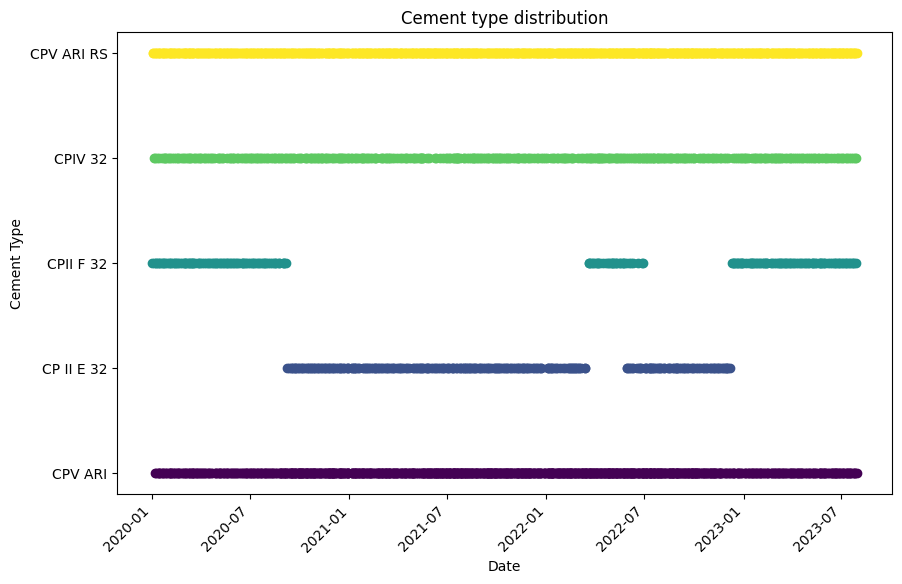

<IPython.core.display.Javascript object>

In [37]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(10, 6))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
# Rotate the x-axis date labels for better readability:
plt.xticks(rotation=45, ha="right")  # Rotate labels by 45 degrees and align them right
plt.show()

/tmp/ipykernel_2795240/2270358942.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


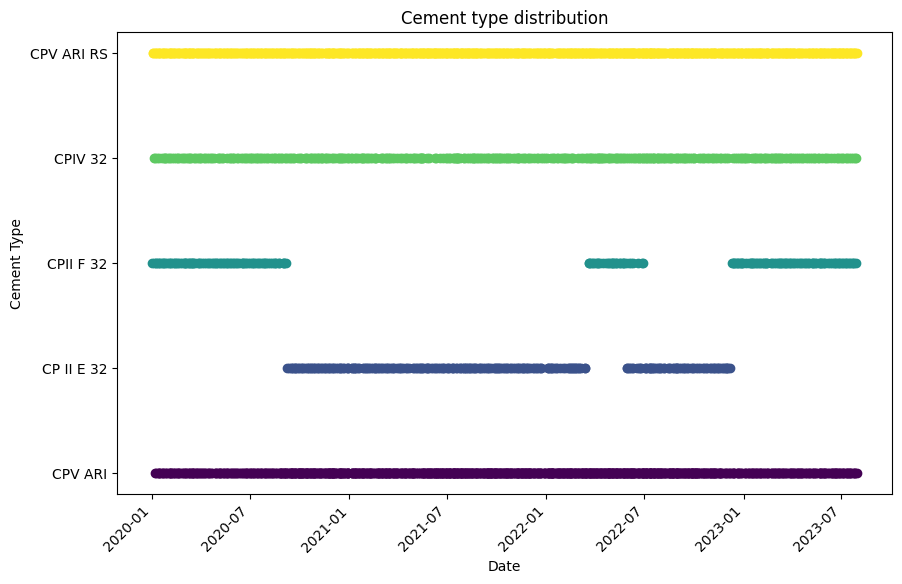

<IPython.core.display.Javascript object>

In [38]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(10, 6))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )

plt.yticks(range(len(categories)), categories)
# plt.legend()  # Uncomment this line if you want to show the legend
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")

# Rotate the x-axis date labels for better readability:
plt.xticks(rotation=45, ha="right")  # Rotate labels by 45 degrees and align them right

plt.show()

In [39]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

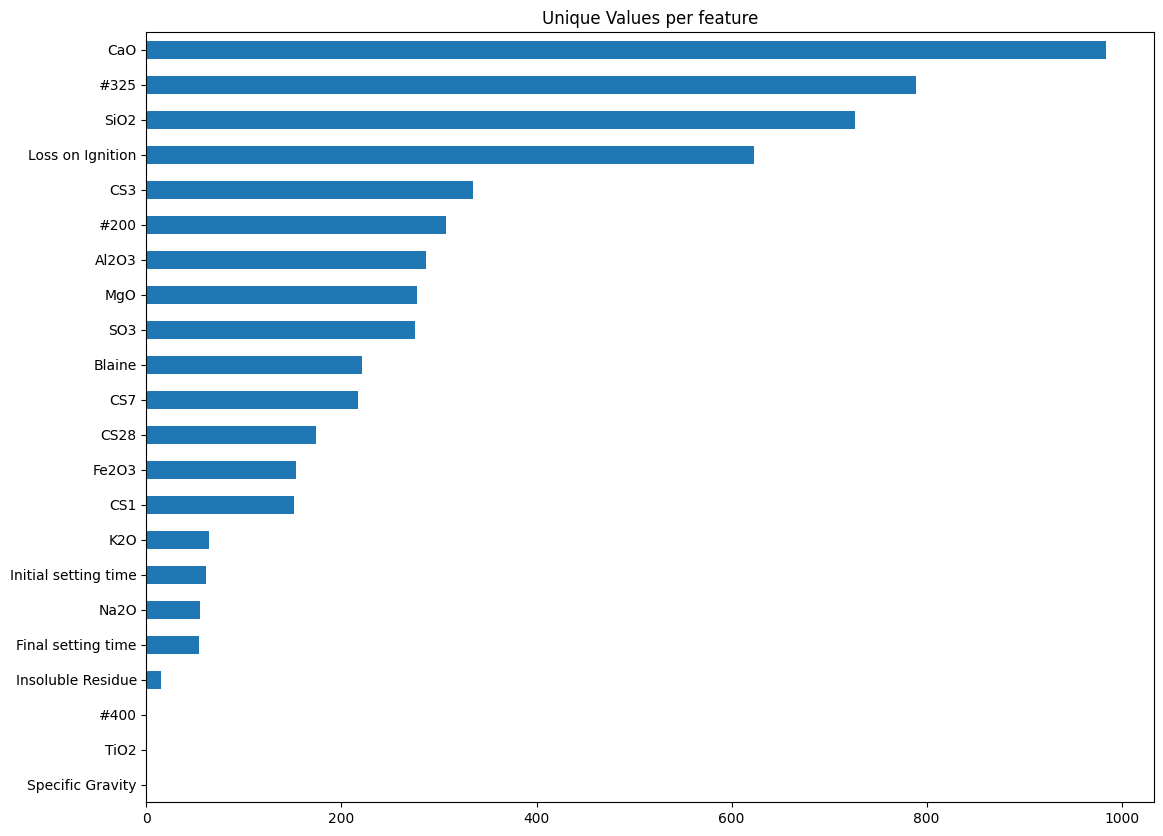

<IPython.core.display.Javascript object>

In [40]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Plant'),
  Text(1, 0, 'City'),
  Text(2, 0, 'Cement_Type'),
  Text(3, 0, 'Date')])

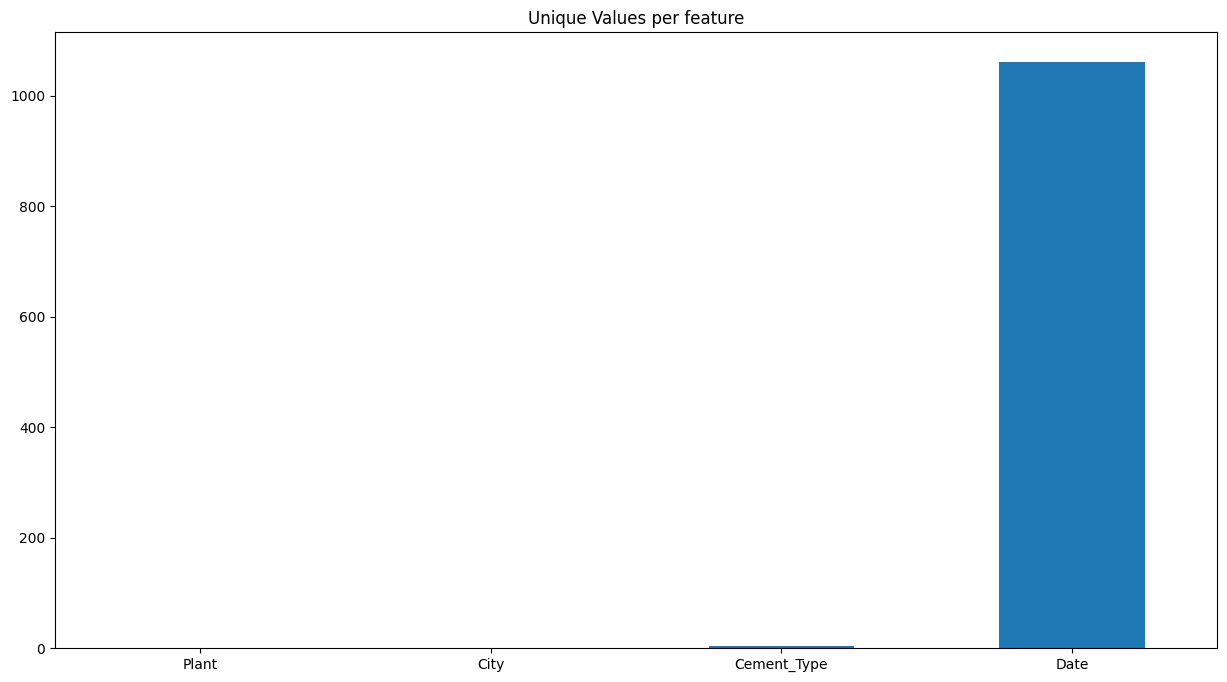

<IPython.core.display.Javascript object>

In [41]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'City'), Text(2, 0, 'Cement_Type')])

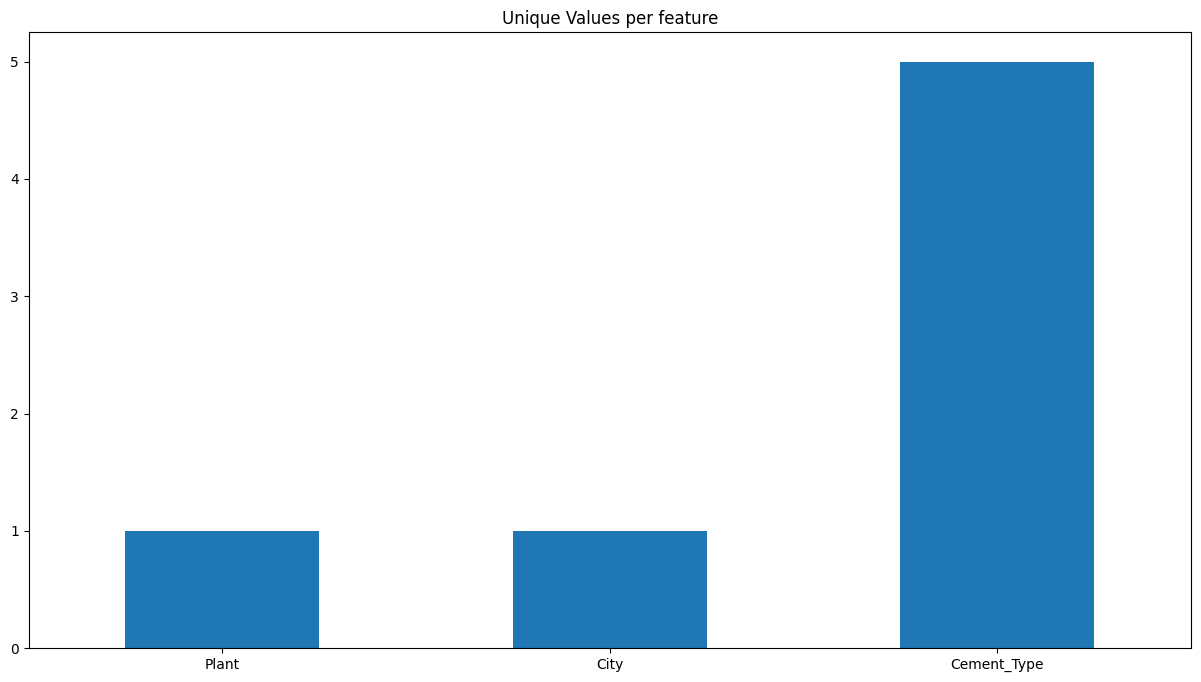

<IPython.core.display.Javascript object>

In [42]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [43]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 18 variables with missing values from a total of 26


<IPython.core.display.Javascript object>

In [44]:
df.isna().any()

Plant                   False
City                    False
Date                    False
CaO                      True
MgO                      True
Na2O                     True
Al2O3                    True
SiO2                     True
SO3                      True
K2O                      True
TiO2                     True
Fe2O3                    True
Loss on Ignition         True
Insoluble Residue        True
Blaine                  False
#200                    False
#325                     True
#400                     True
Specific Gravity         True
Final setting time      False
Initial setting time    False
CS1                      True
CS3                      True
CS7                      True
CS28                     True
Cement_Type             False
dtype: bool

<IPython.core.display.Javascript object>

In [45]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [46]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 26 artists>

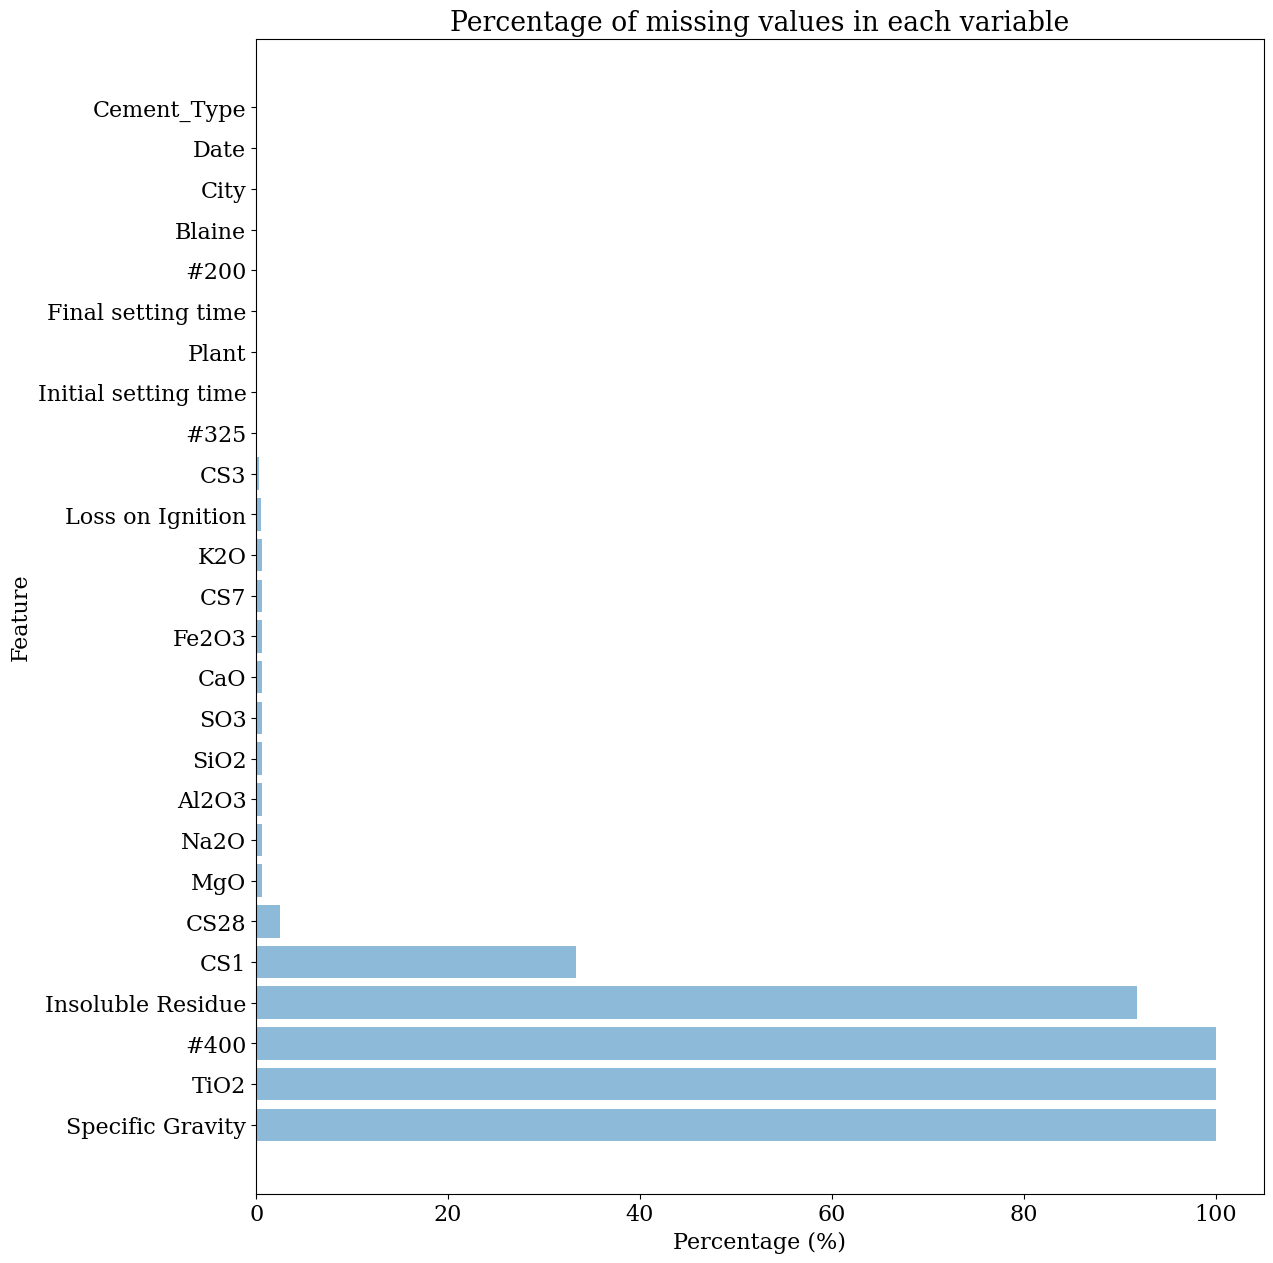

<IPython.core.display.Javascript object>

In [47]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [48]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [49]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

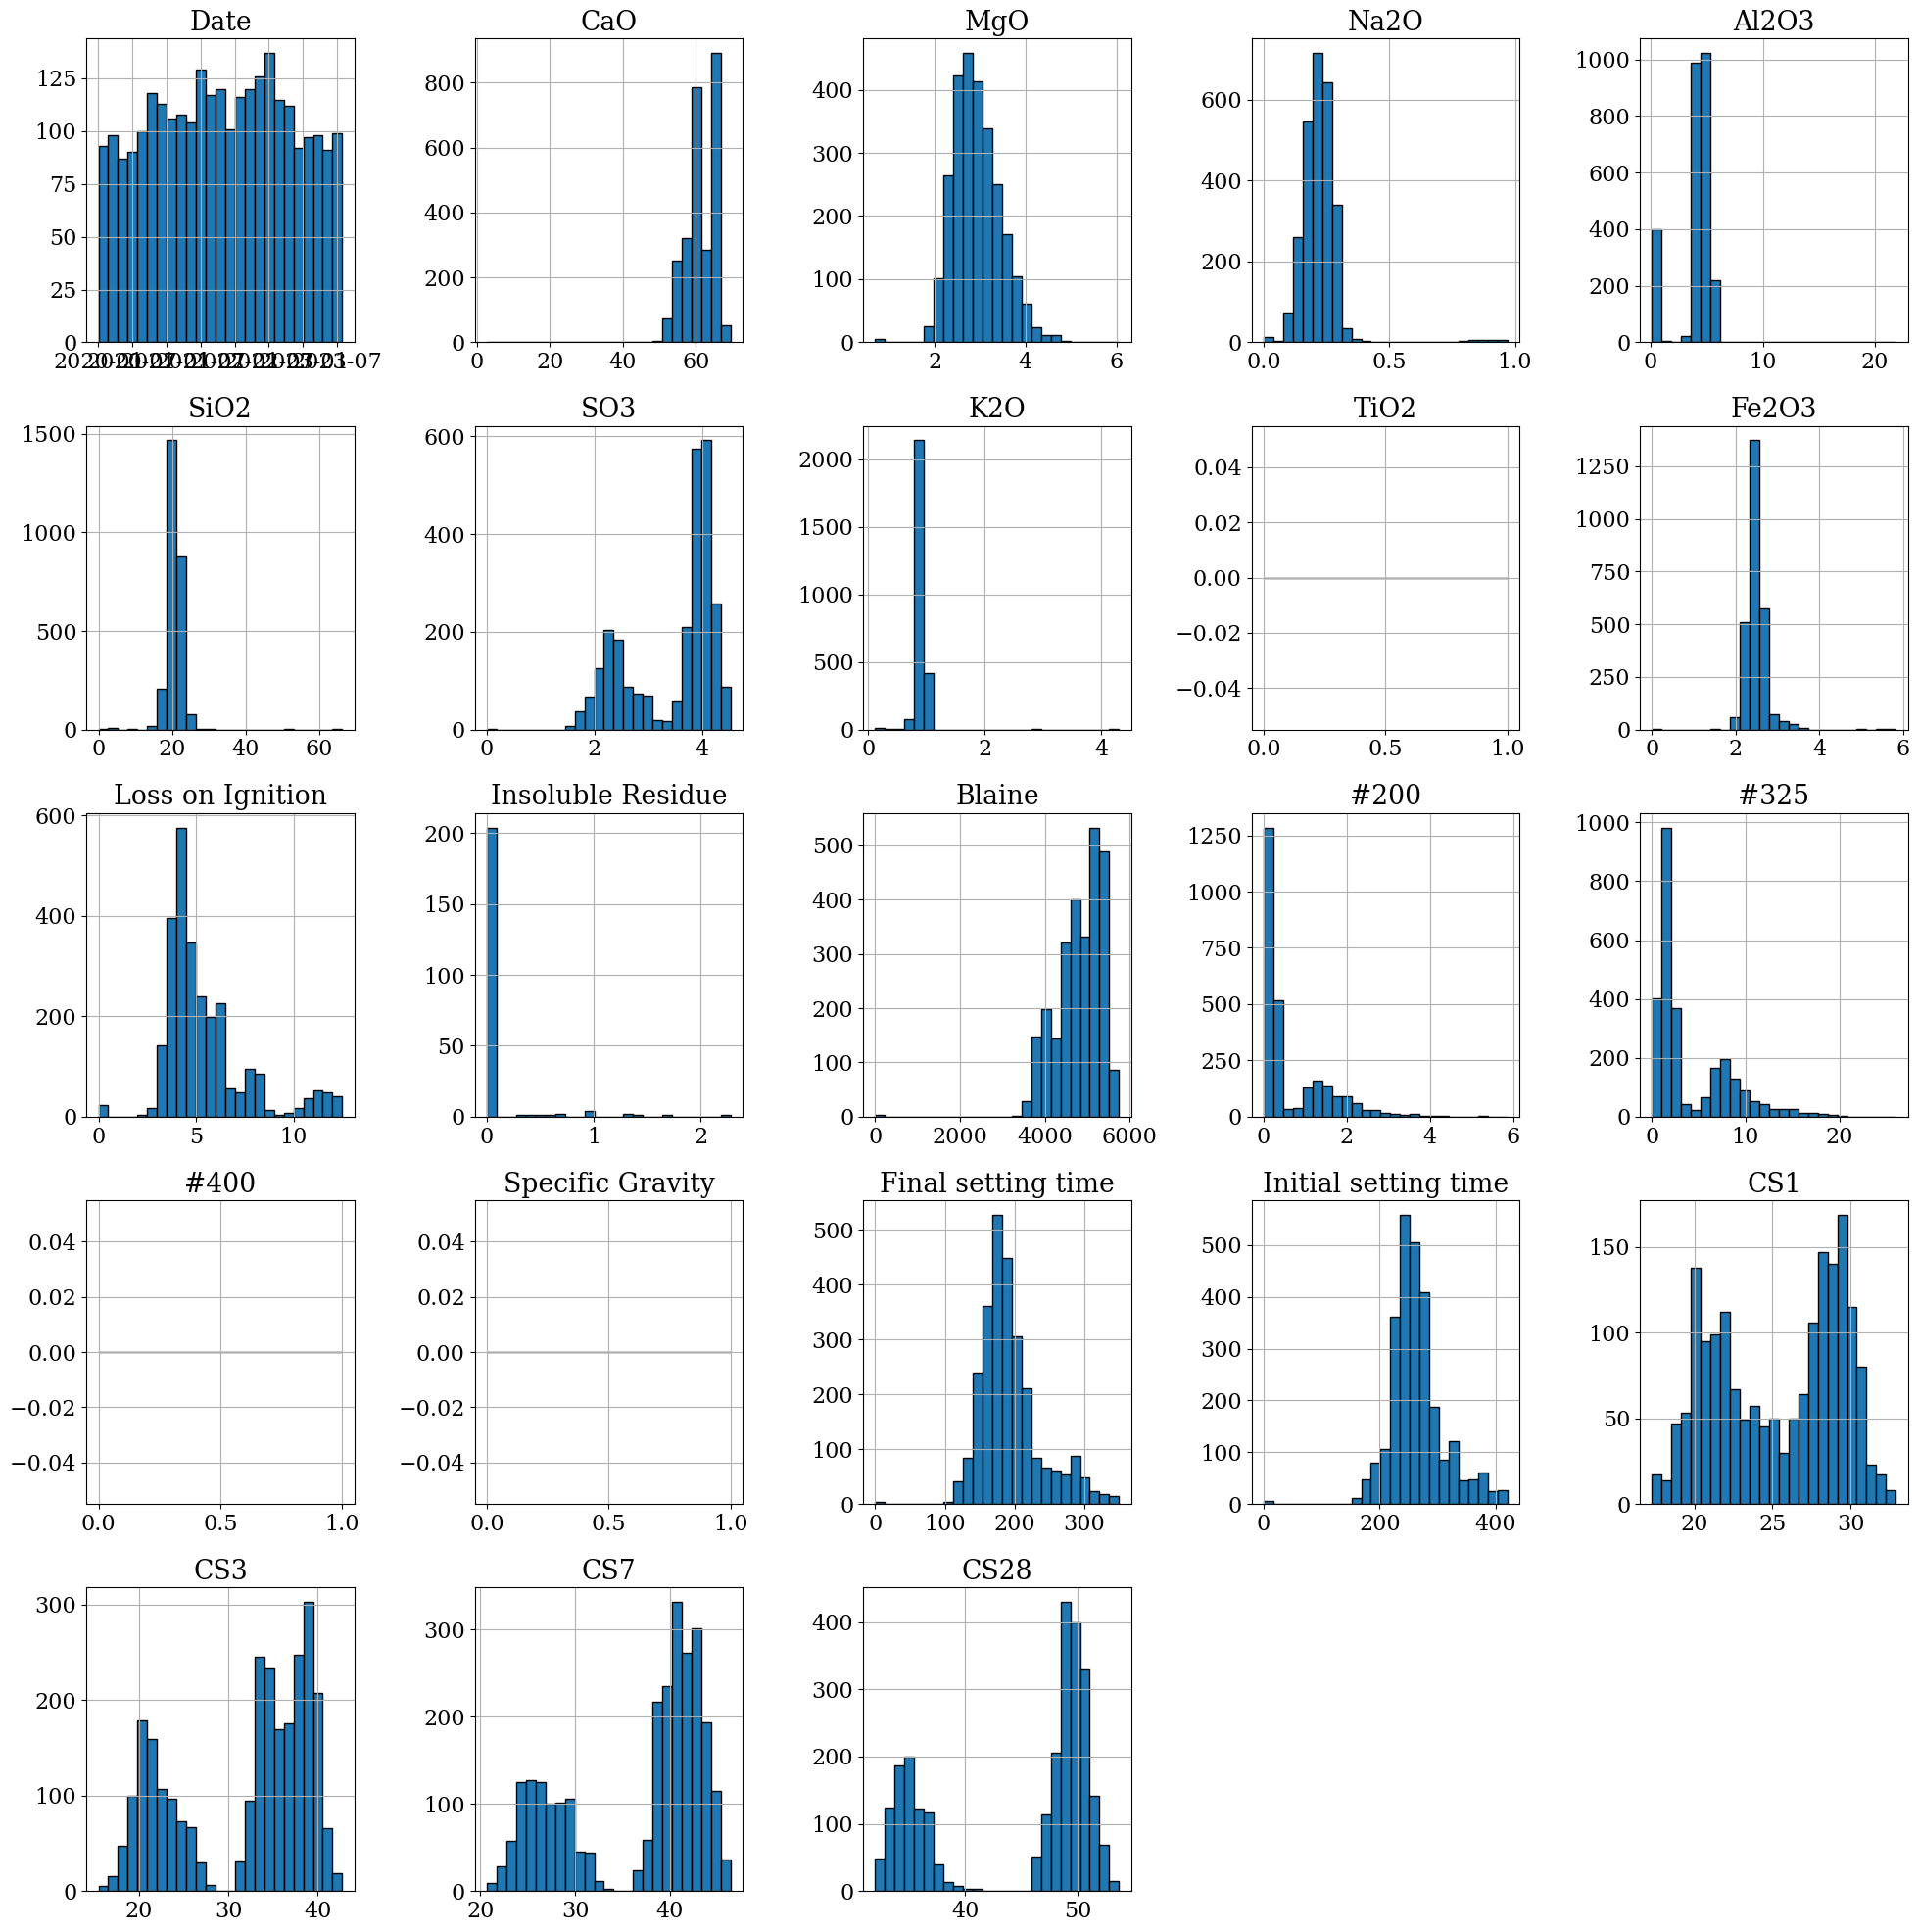

<IPython.core.display.Javascript object>

In [50]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

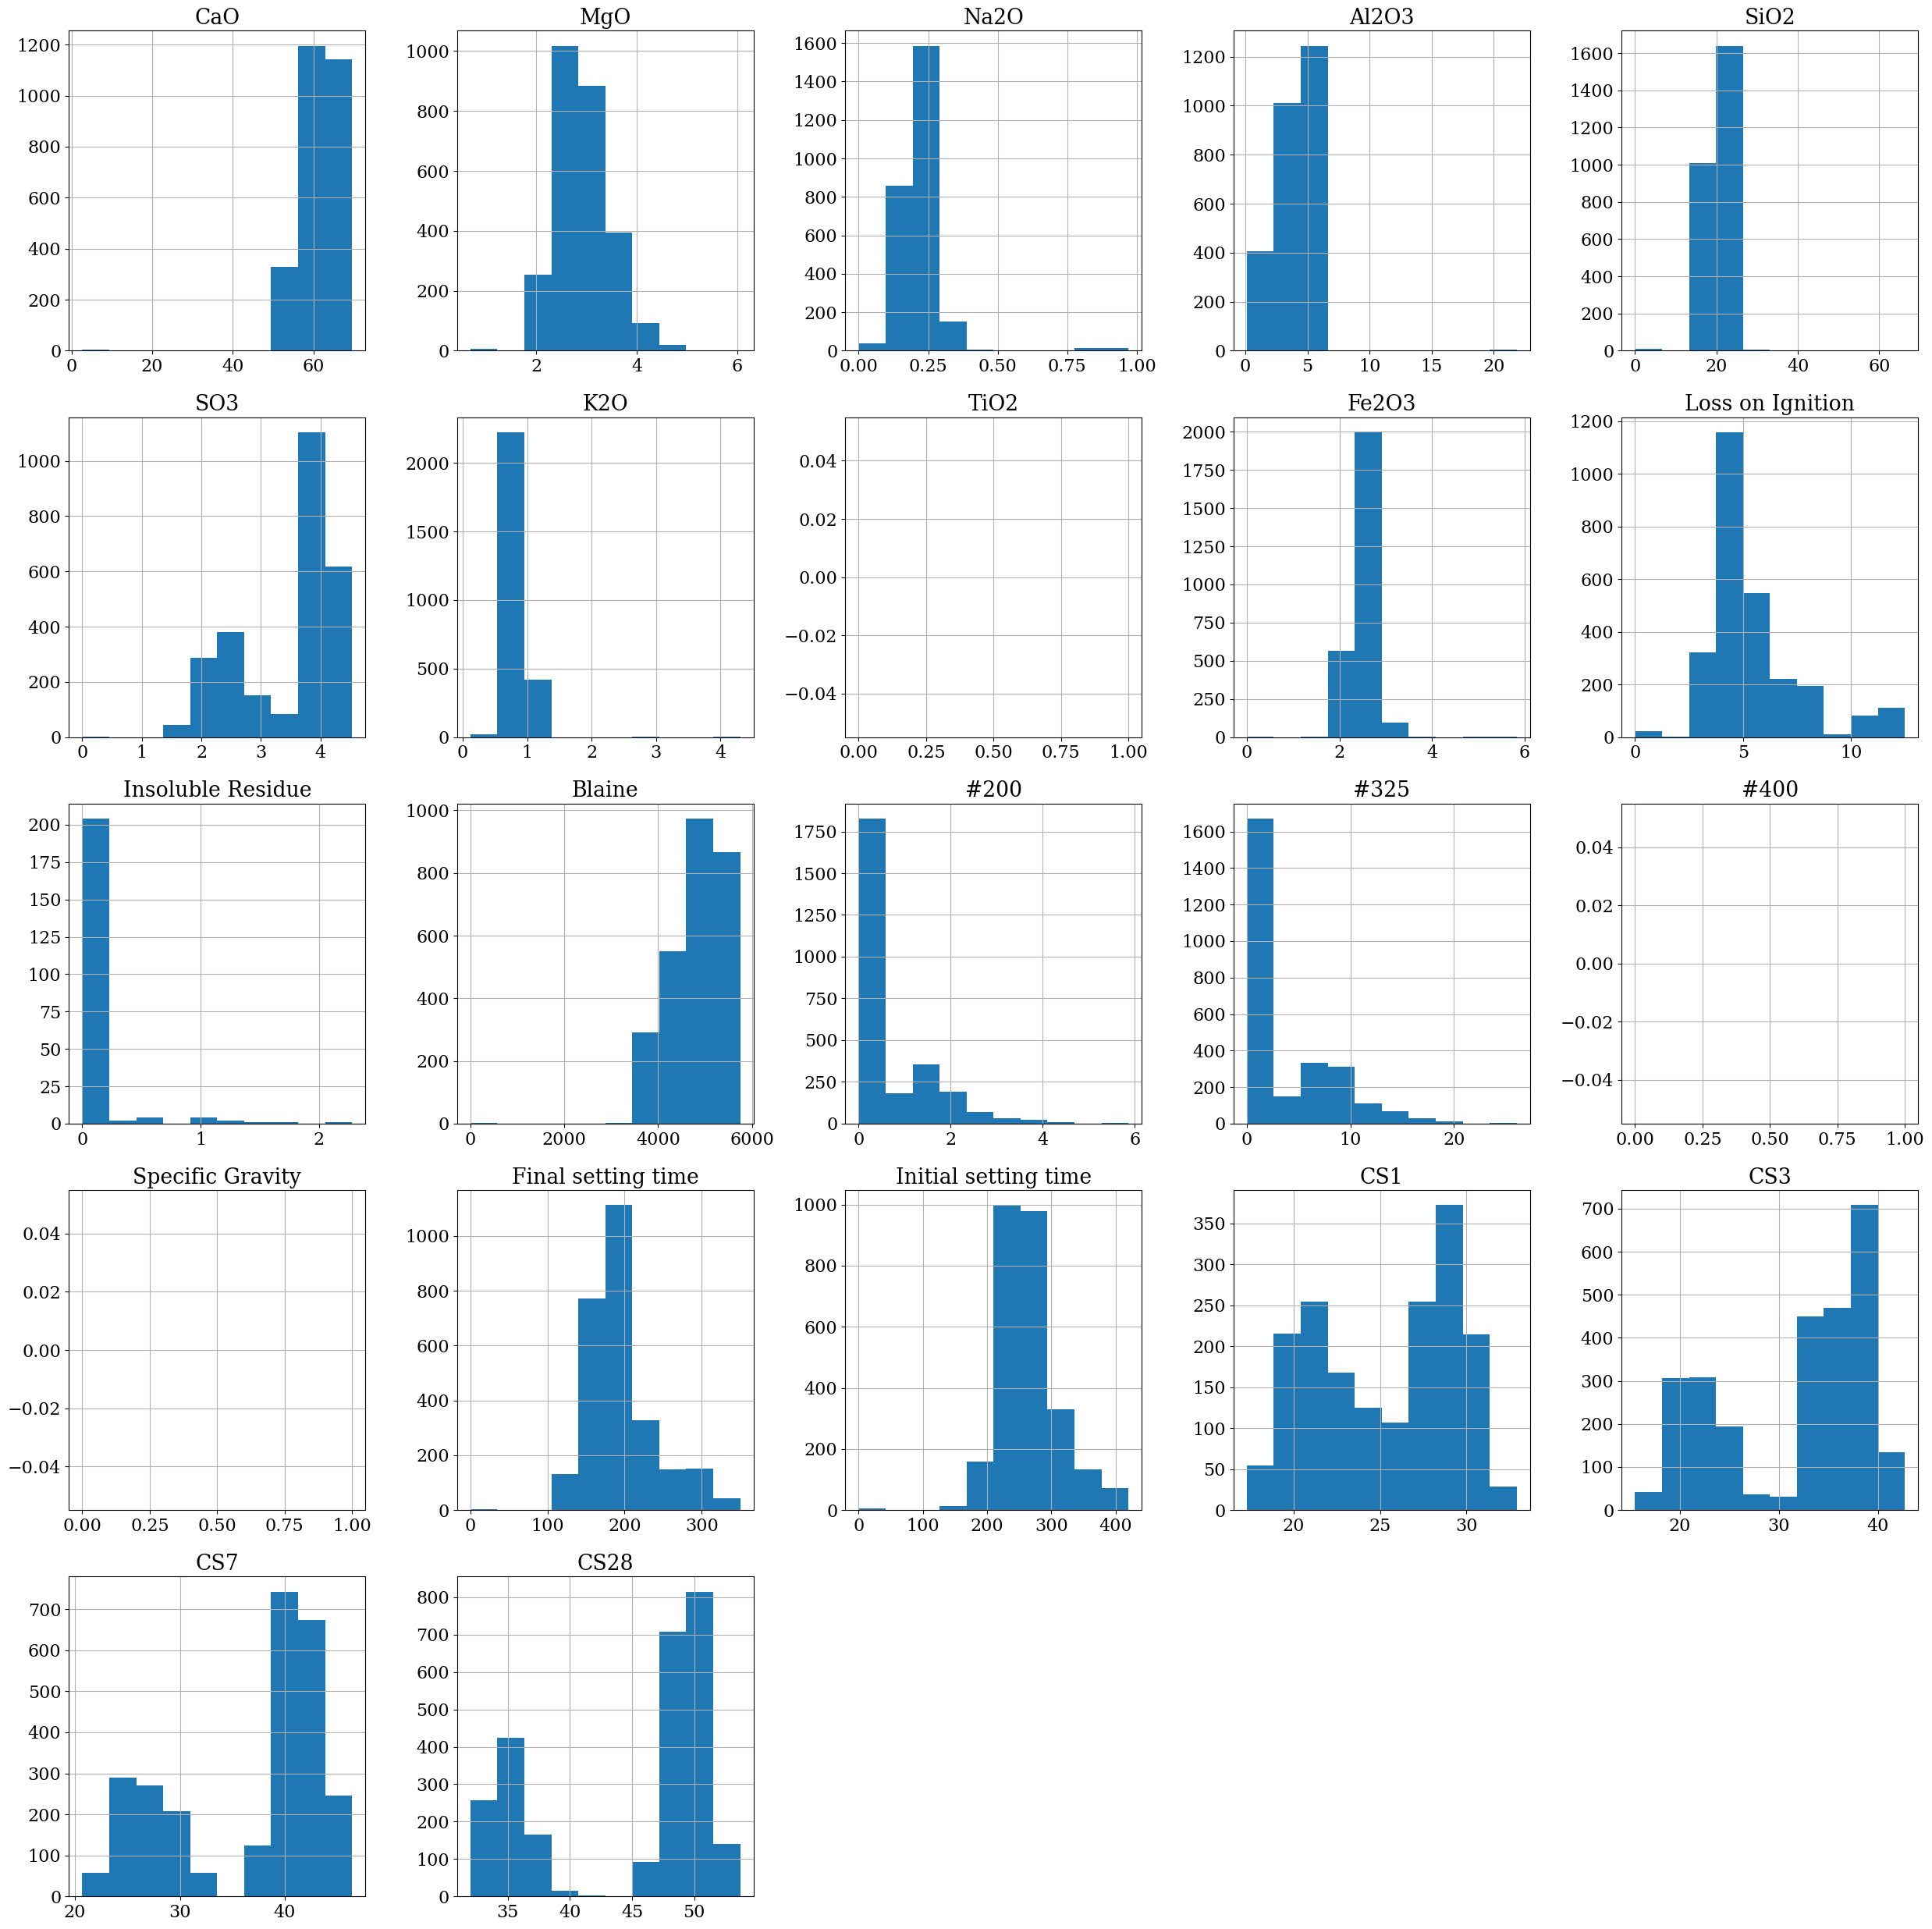

<IPython.core.display.Javascript object>

In [51]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

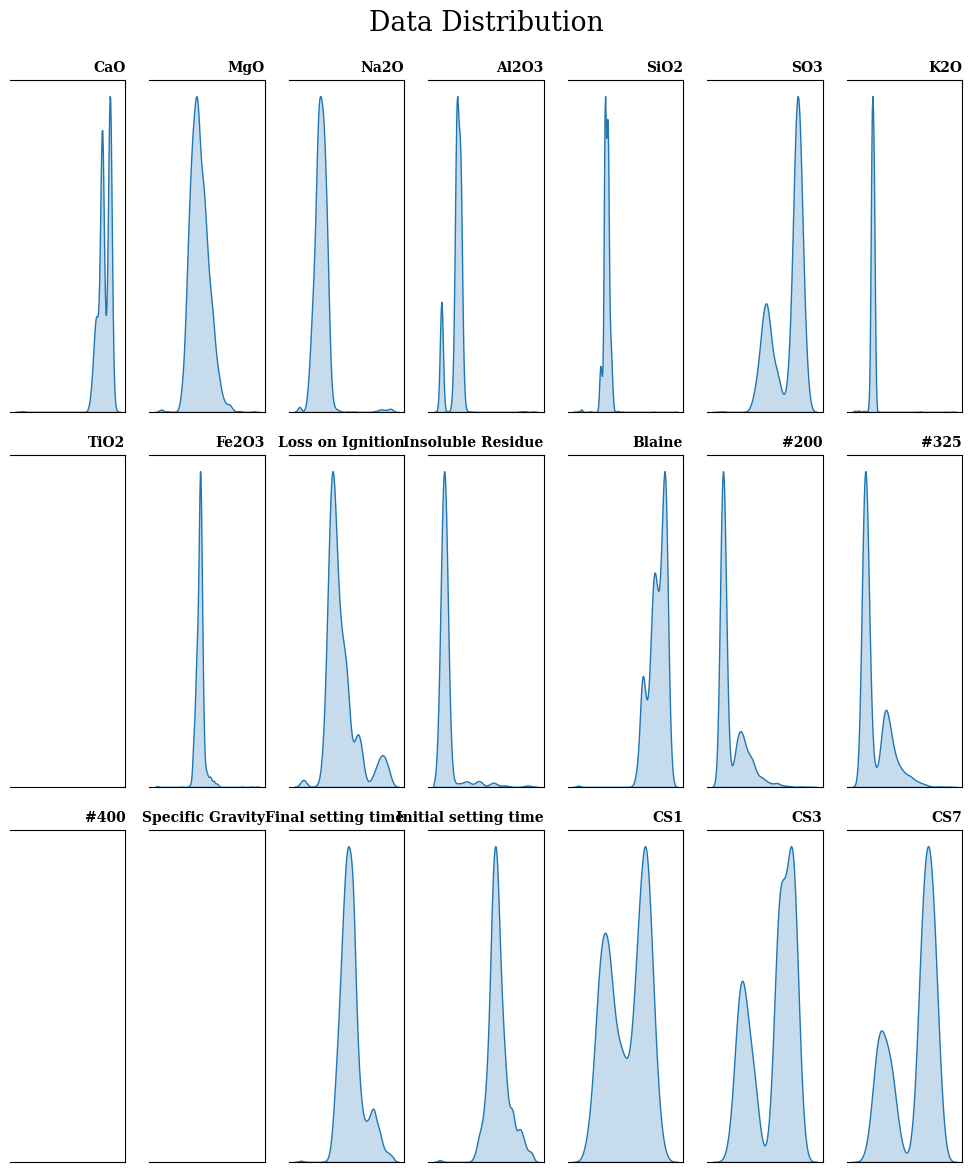

<IPython.core.display.Javascript object>

In [52]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 7, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

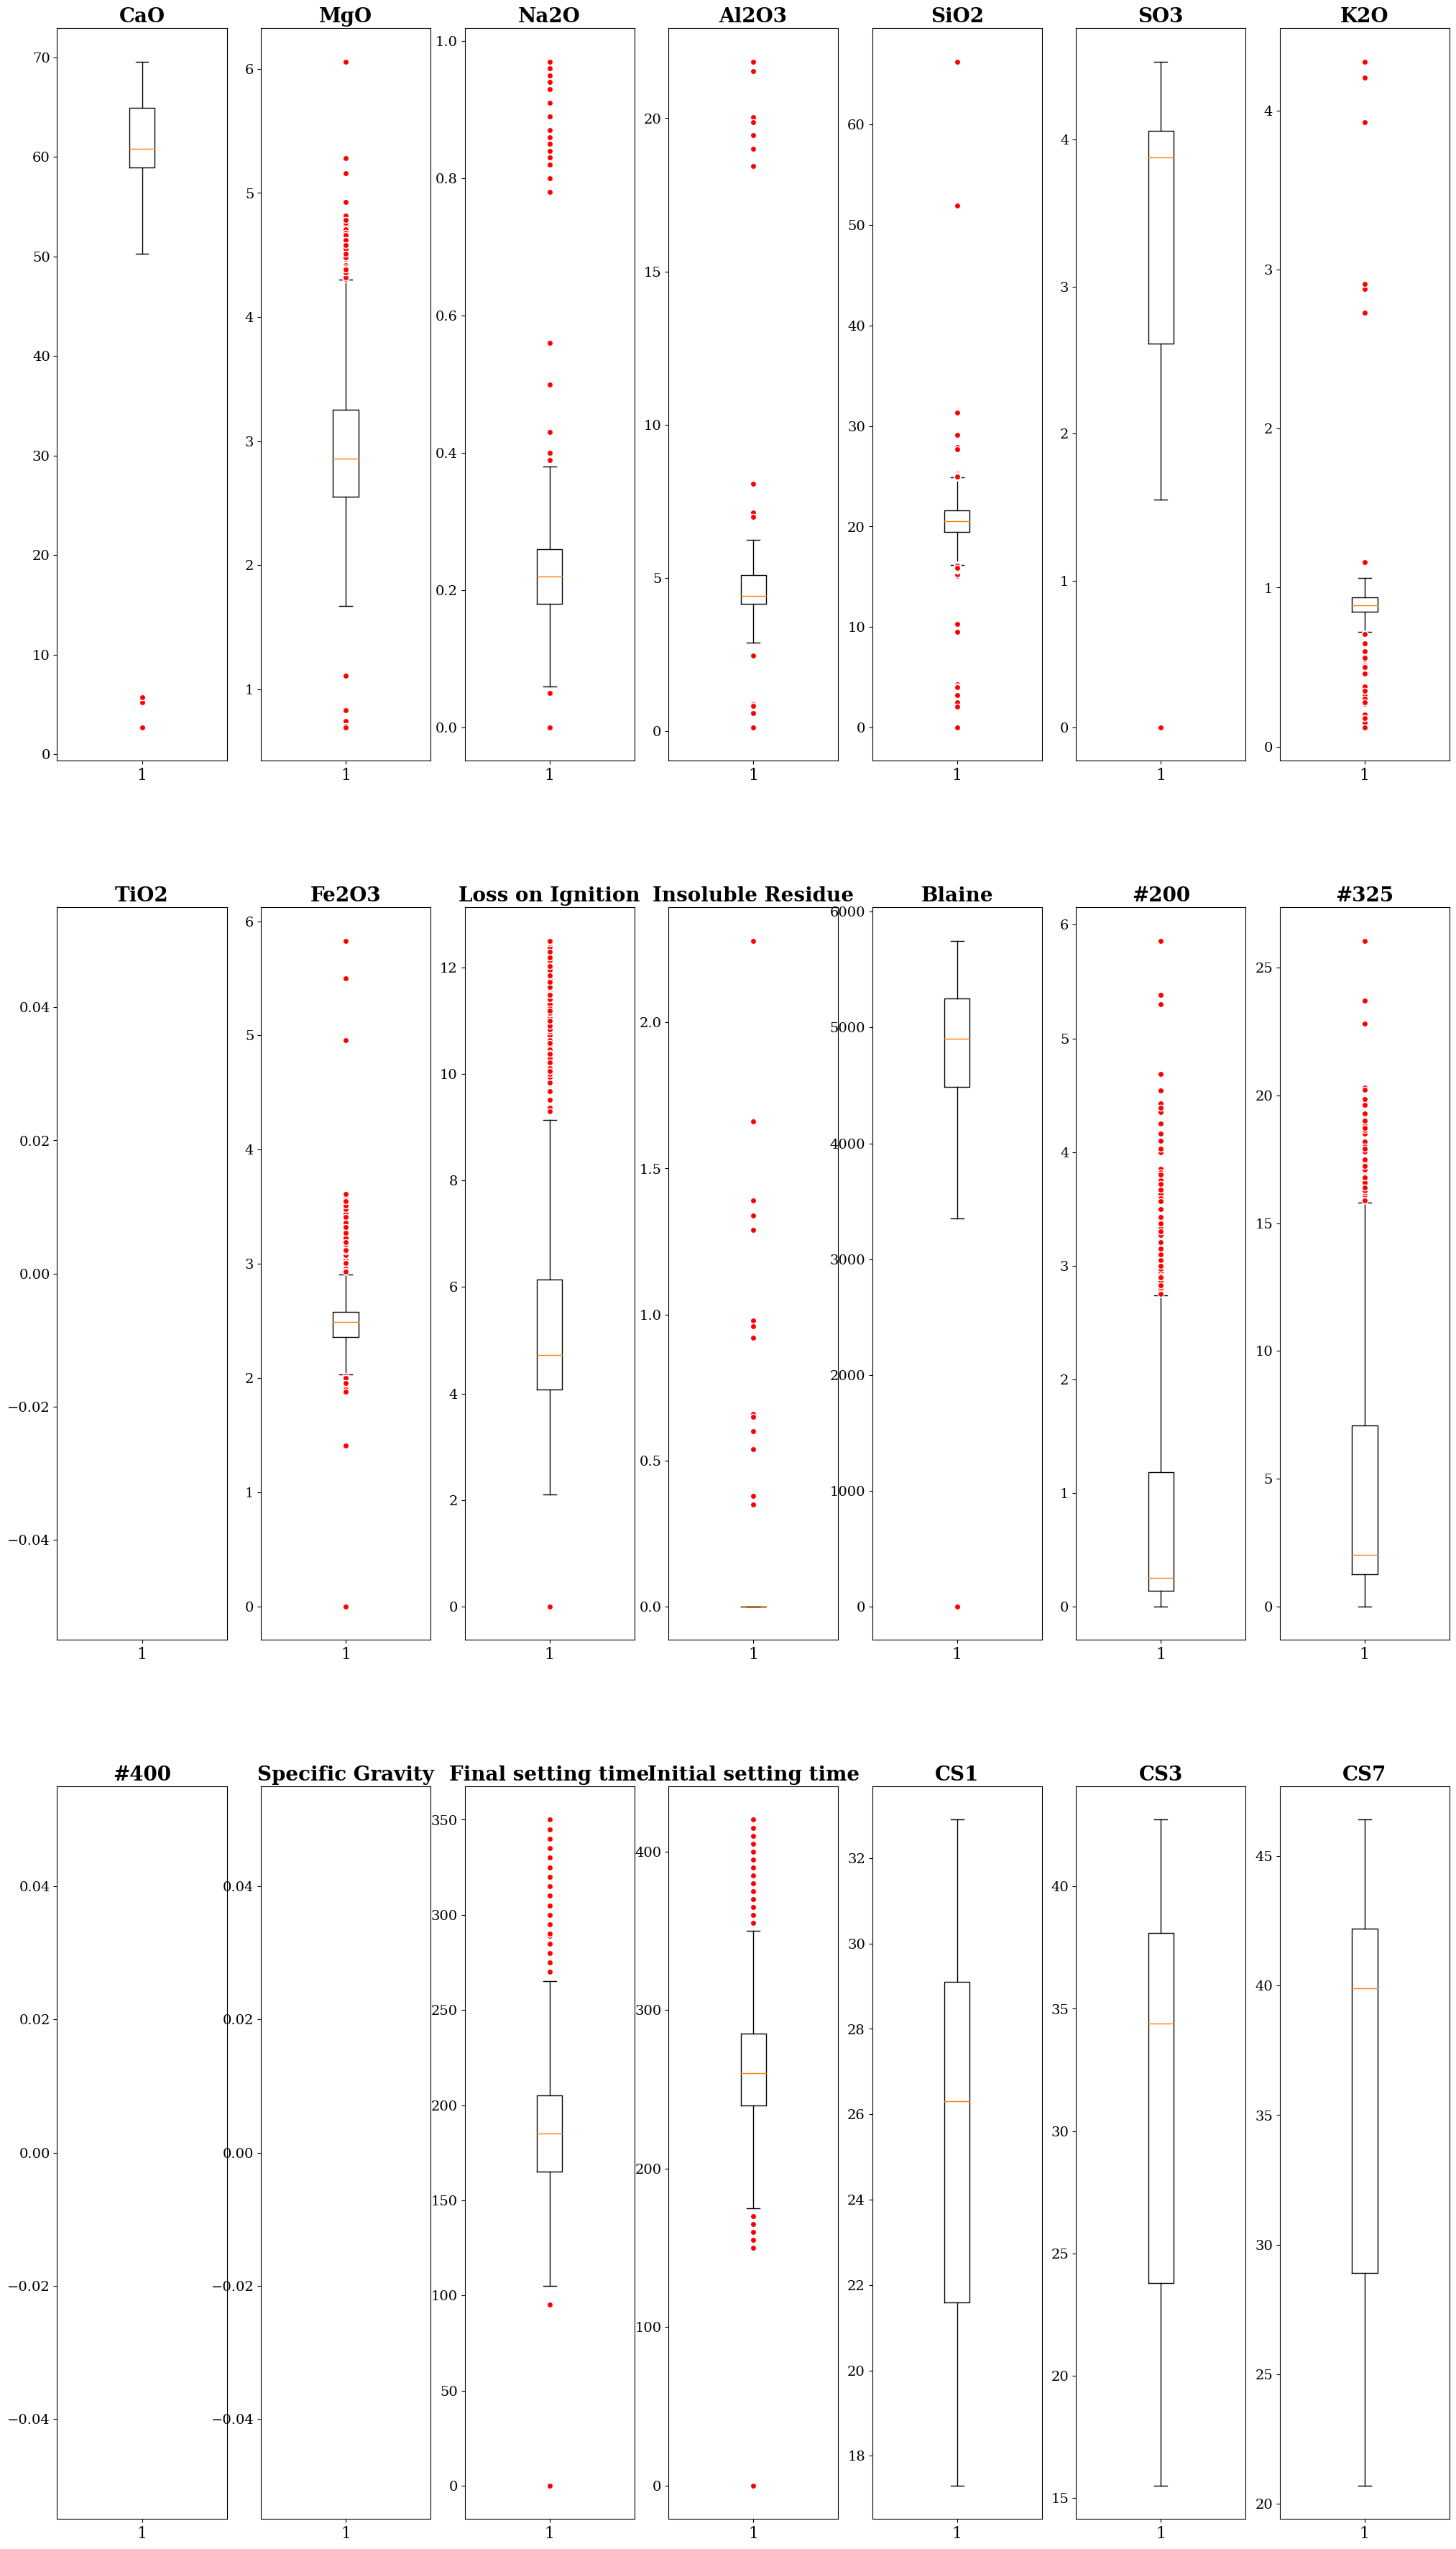

<IPython.core.display.Javascript object>

In [53]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

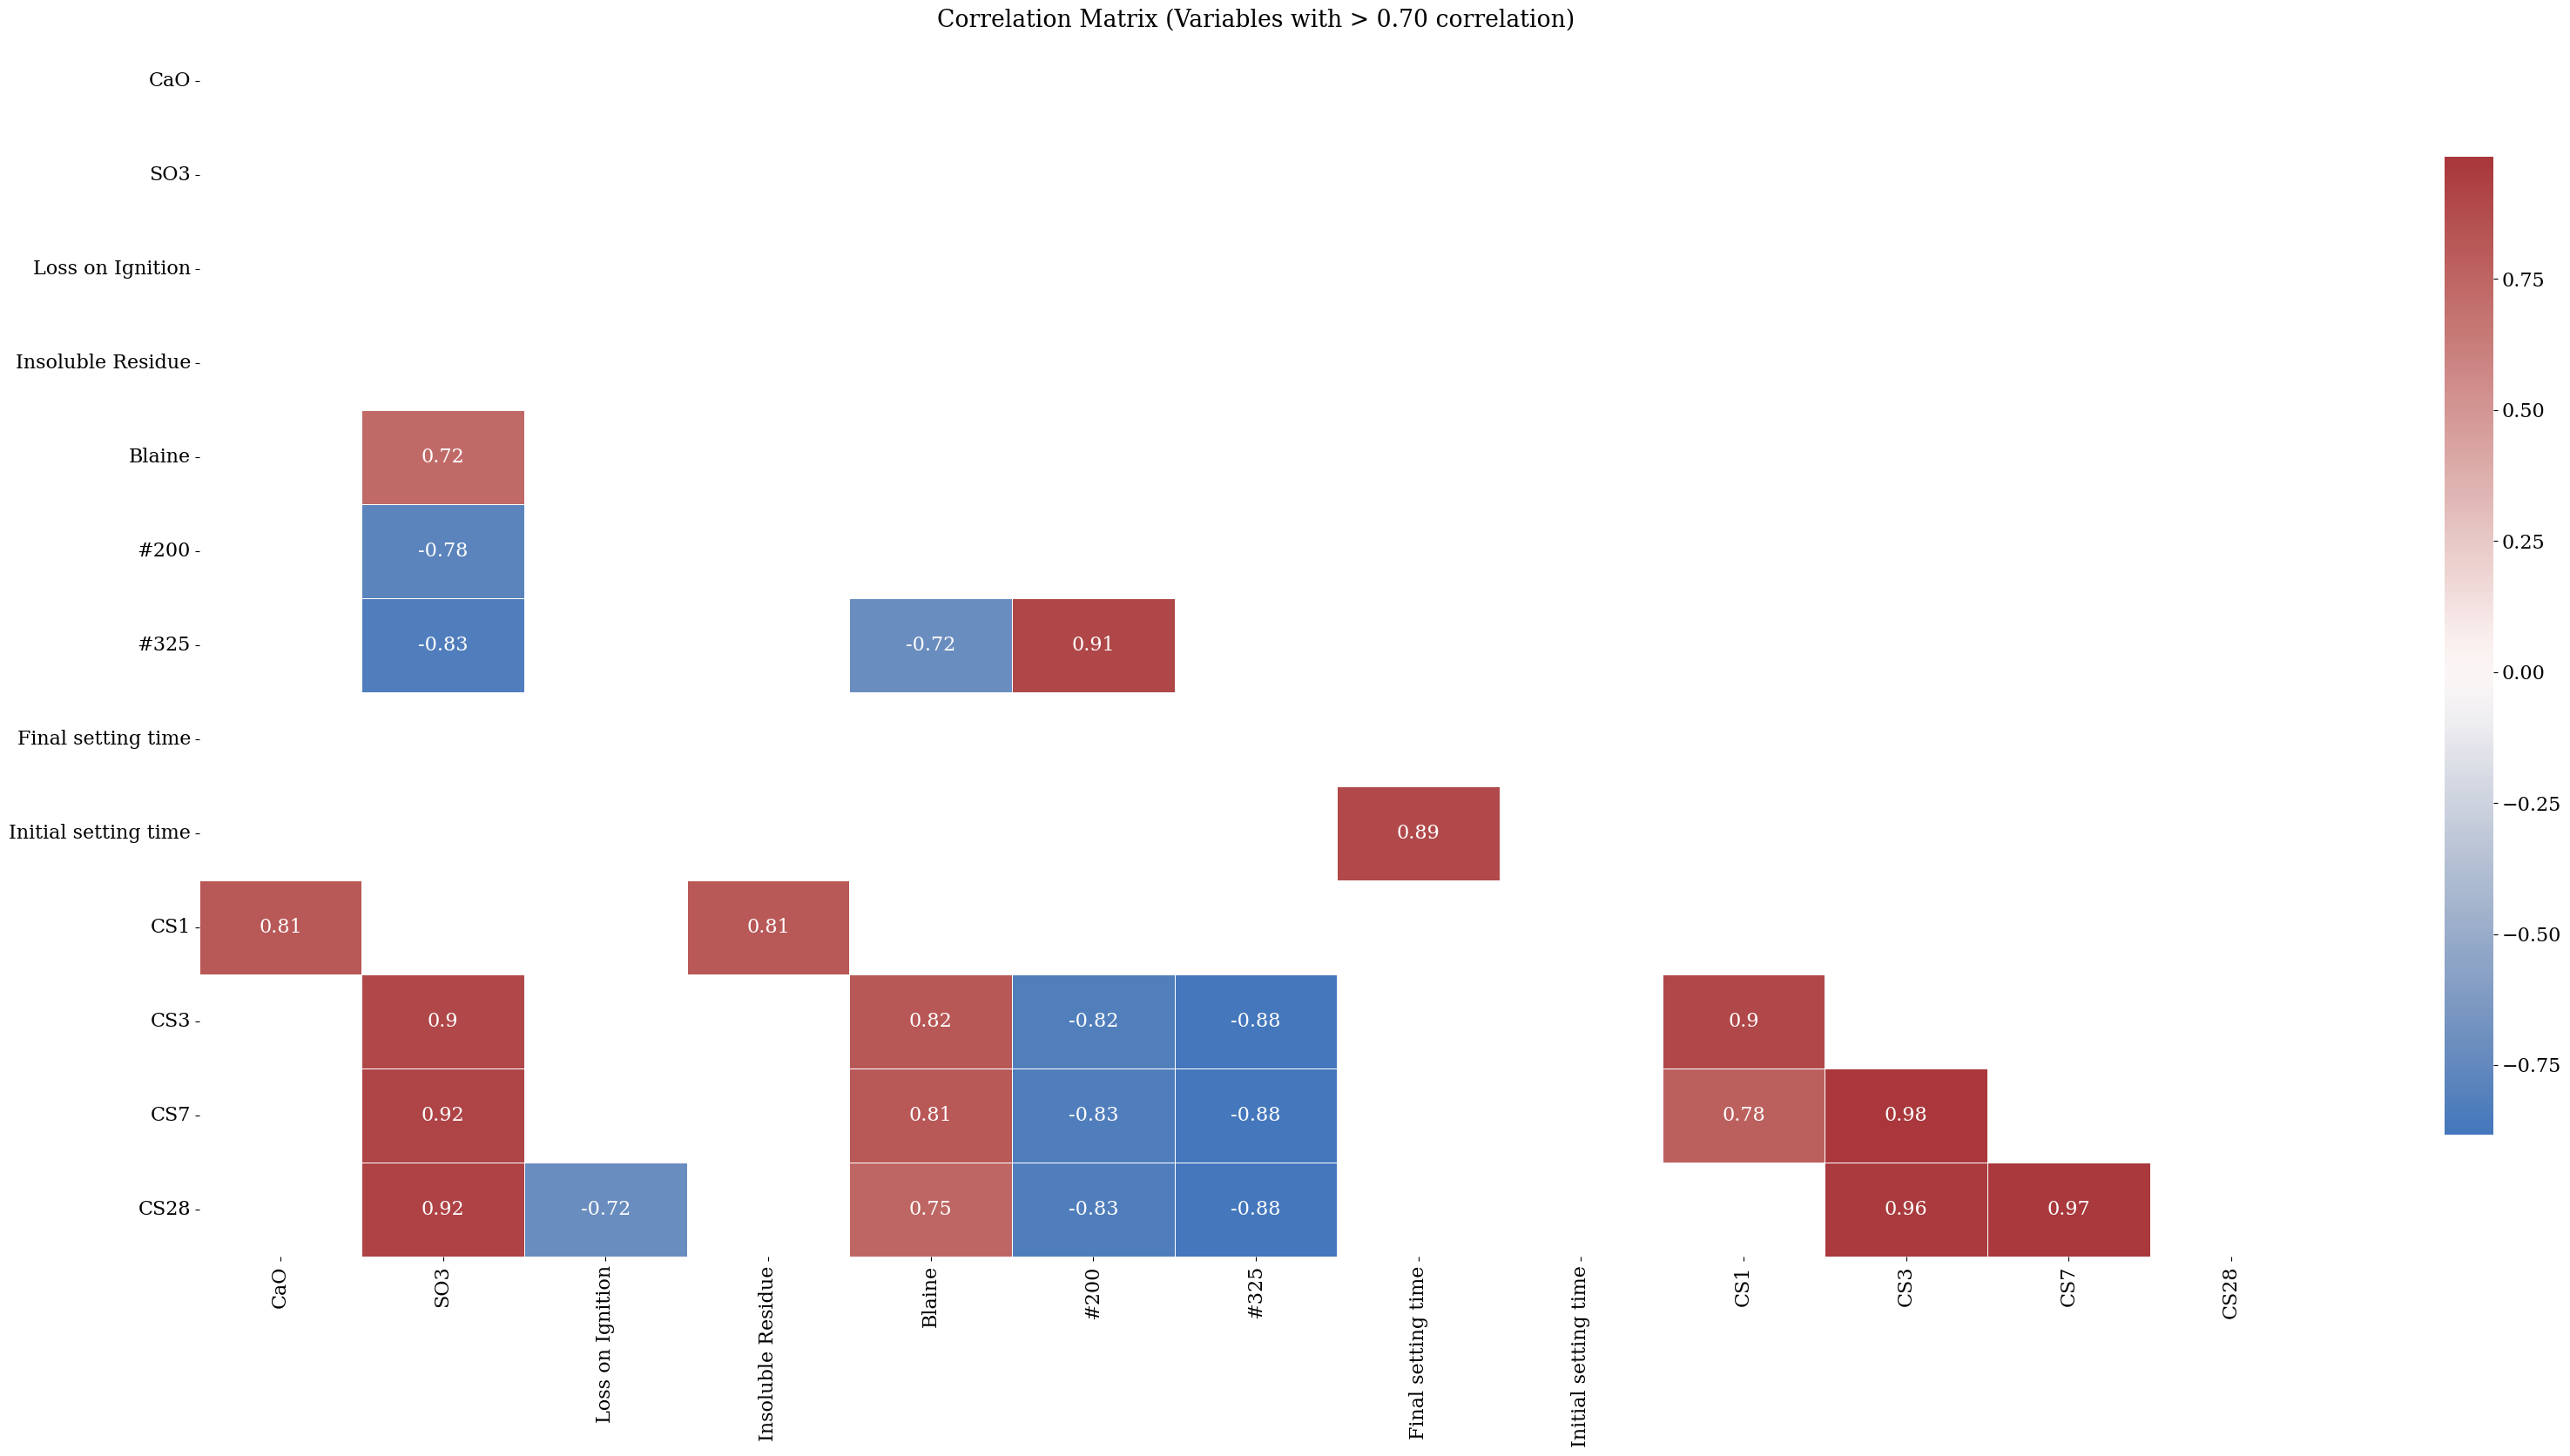

<IPython.core.display.Javascript object>

In [54]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="pearson"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [55]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="pearson")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS3                 CS7                     0.983690
CS7                 CS28                    0.968513
CS3                 CS28                    0.955574
SO3                 CS28                    0.919295
                    CS7                     0.917459
#200                #325                    0.909174
SO3                 CS3                     0.898734
CS1                 CS3                     0.897060
Final setting time  Initial setting time    0.892412
#325                CS28                    0.882972
                    CS7                     0.879599
                    CS3                     0.877399
#200                CS28                    0.831846
SO3                 #325                    0.827251
#200                CS7                     0.826200
Blaine              CS3                     0.822399
#200                CS3                     0.819726
CaO                 CS1                     0.812125
Insoluble Residue   CS1                     0.

<IPython.core.display.Javascript object>

In [56]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.968513
CS3                   CS28    0.955574
SO3                   CS28    0.919295
#325                  CS28    0.882972
#200                  CS28    0.831846
Blaine                CS28    0.748703
Loss on Ignition      CS28    0.716667
Final setting time    CS28    0.651142
Initial setting time  CS28    0.647272
Al2O3                 CS28    0.502968
CaO                   CS28    0.494713
Insoluble Residue     CS28    0.476654
CS1                   CS28    0.439099
Na2O                  CS28    0.350028
MgO                   CS28    0.269995
K2O                   CS28    0.213425
SiO2                  CS28    0.170672
Fe2O3                 CS28    0.042108
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

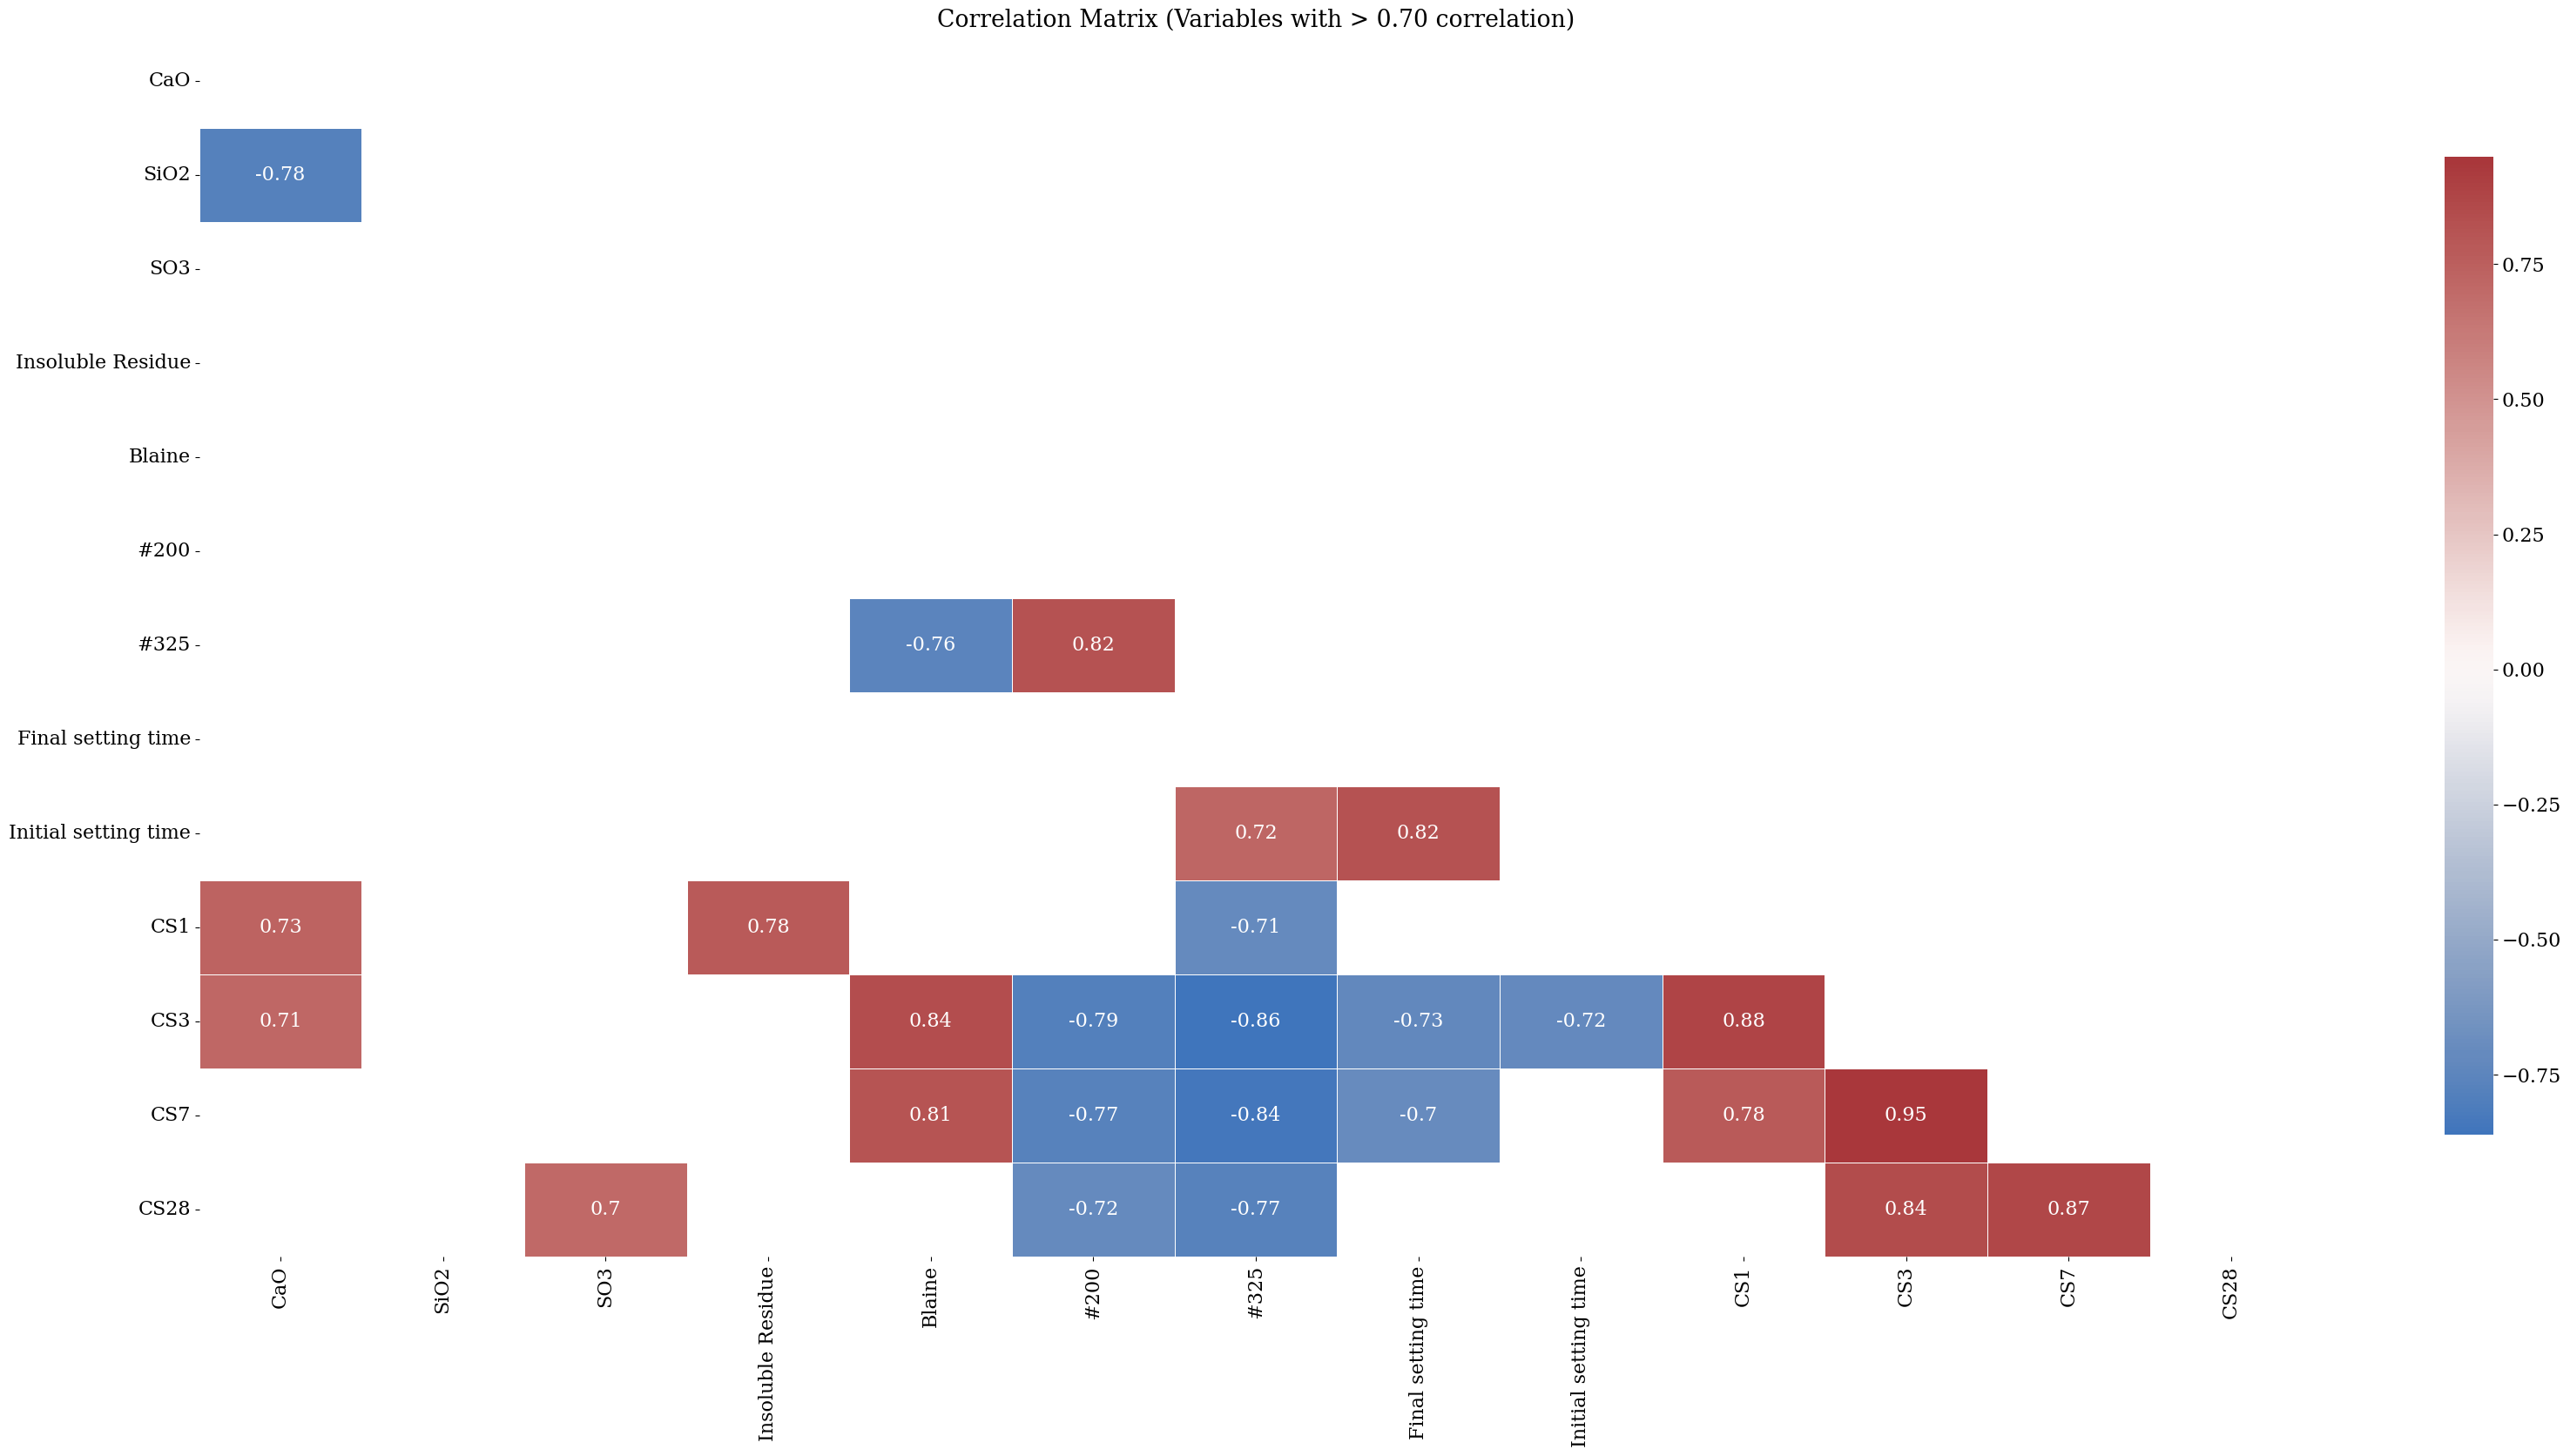

<IPython.core.display.Javascript object>

In [57]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="spearman"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [58]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="spearman")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS3                   CS7                     0.949124
CS1                   CS3                     0.878575
CS7                   CS28                    0.869587
#325                  CS3                     0.861156
CS3                   CS28                    0.843252
#325                  CS7                     0.840108
Blaine                CS3                     0.839588
Final setting time    Initial setting time    0.818337
#200                  #325                    0.816447
Blaine                CS7                     0.813141
#200                  CS3                     0.789094
Insoluble Residue     CS1                     0.783333
CS1                   CS7                     0.781011
CaO                   SiO2                    0.780475
#200                  CS7                     0.773814
#325                  CS28                    0.771411
Blaine                #325                    0.758861
CaO                   CS1                     0.731914
Final sett

<IPython.core.display.Javascript object>

In [59]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.869587
CS3                   CS28    0.843252
#325                  CS28    0.771411
#200                  CS28    0.715314
SO3                   CS28    0.703387
Loss on Ignition      CS28    0.682133
Blaine                CS28    0.671902
Initial setting time  CS28    0.623420
Final setting time    CS28    0.613885
CaO                   CS28    0.507826
K2O                   CS28    0.499596
Na2O                  CS28    0.491300
CS1                   CS28    0.464634
Insoluble Residue     CS28    0.345348
SiO2                  CS28    0.330586
MgO                   CS28    0.275647
Al2O3                 CS28    0.246249
Fe2O3                 CS28    0.076448
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

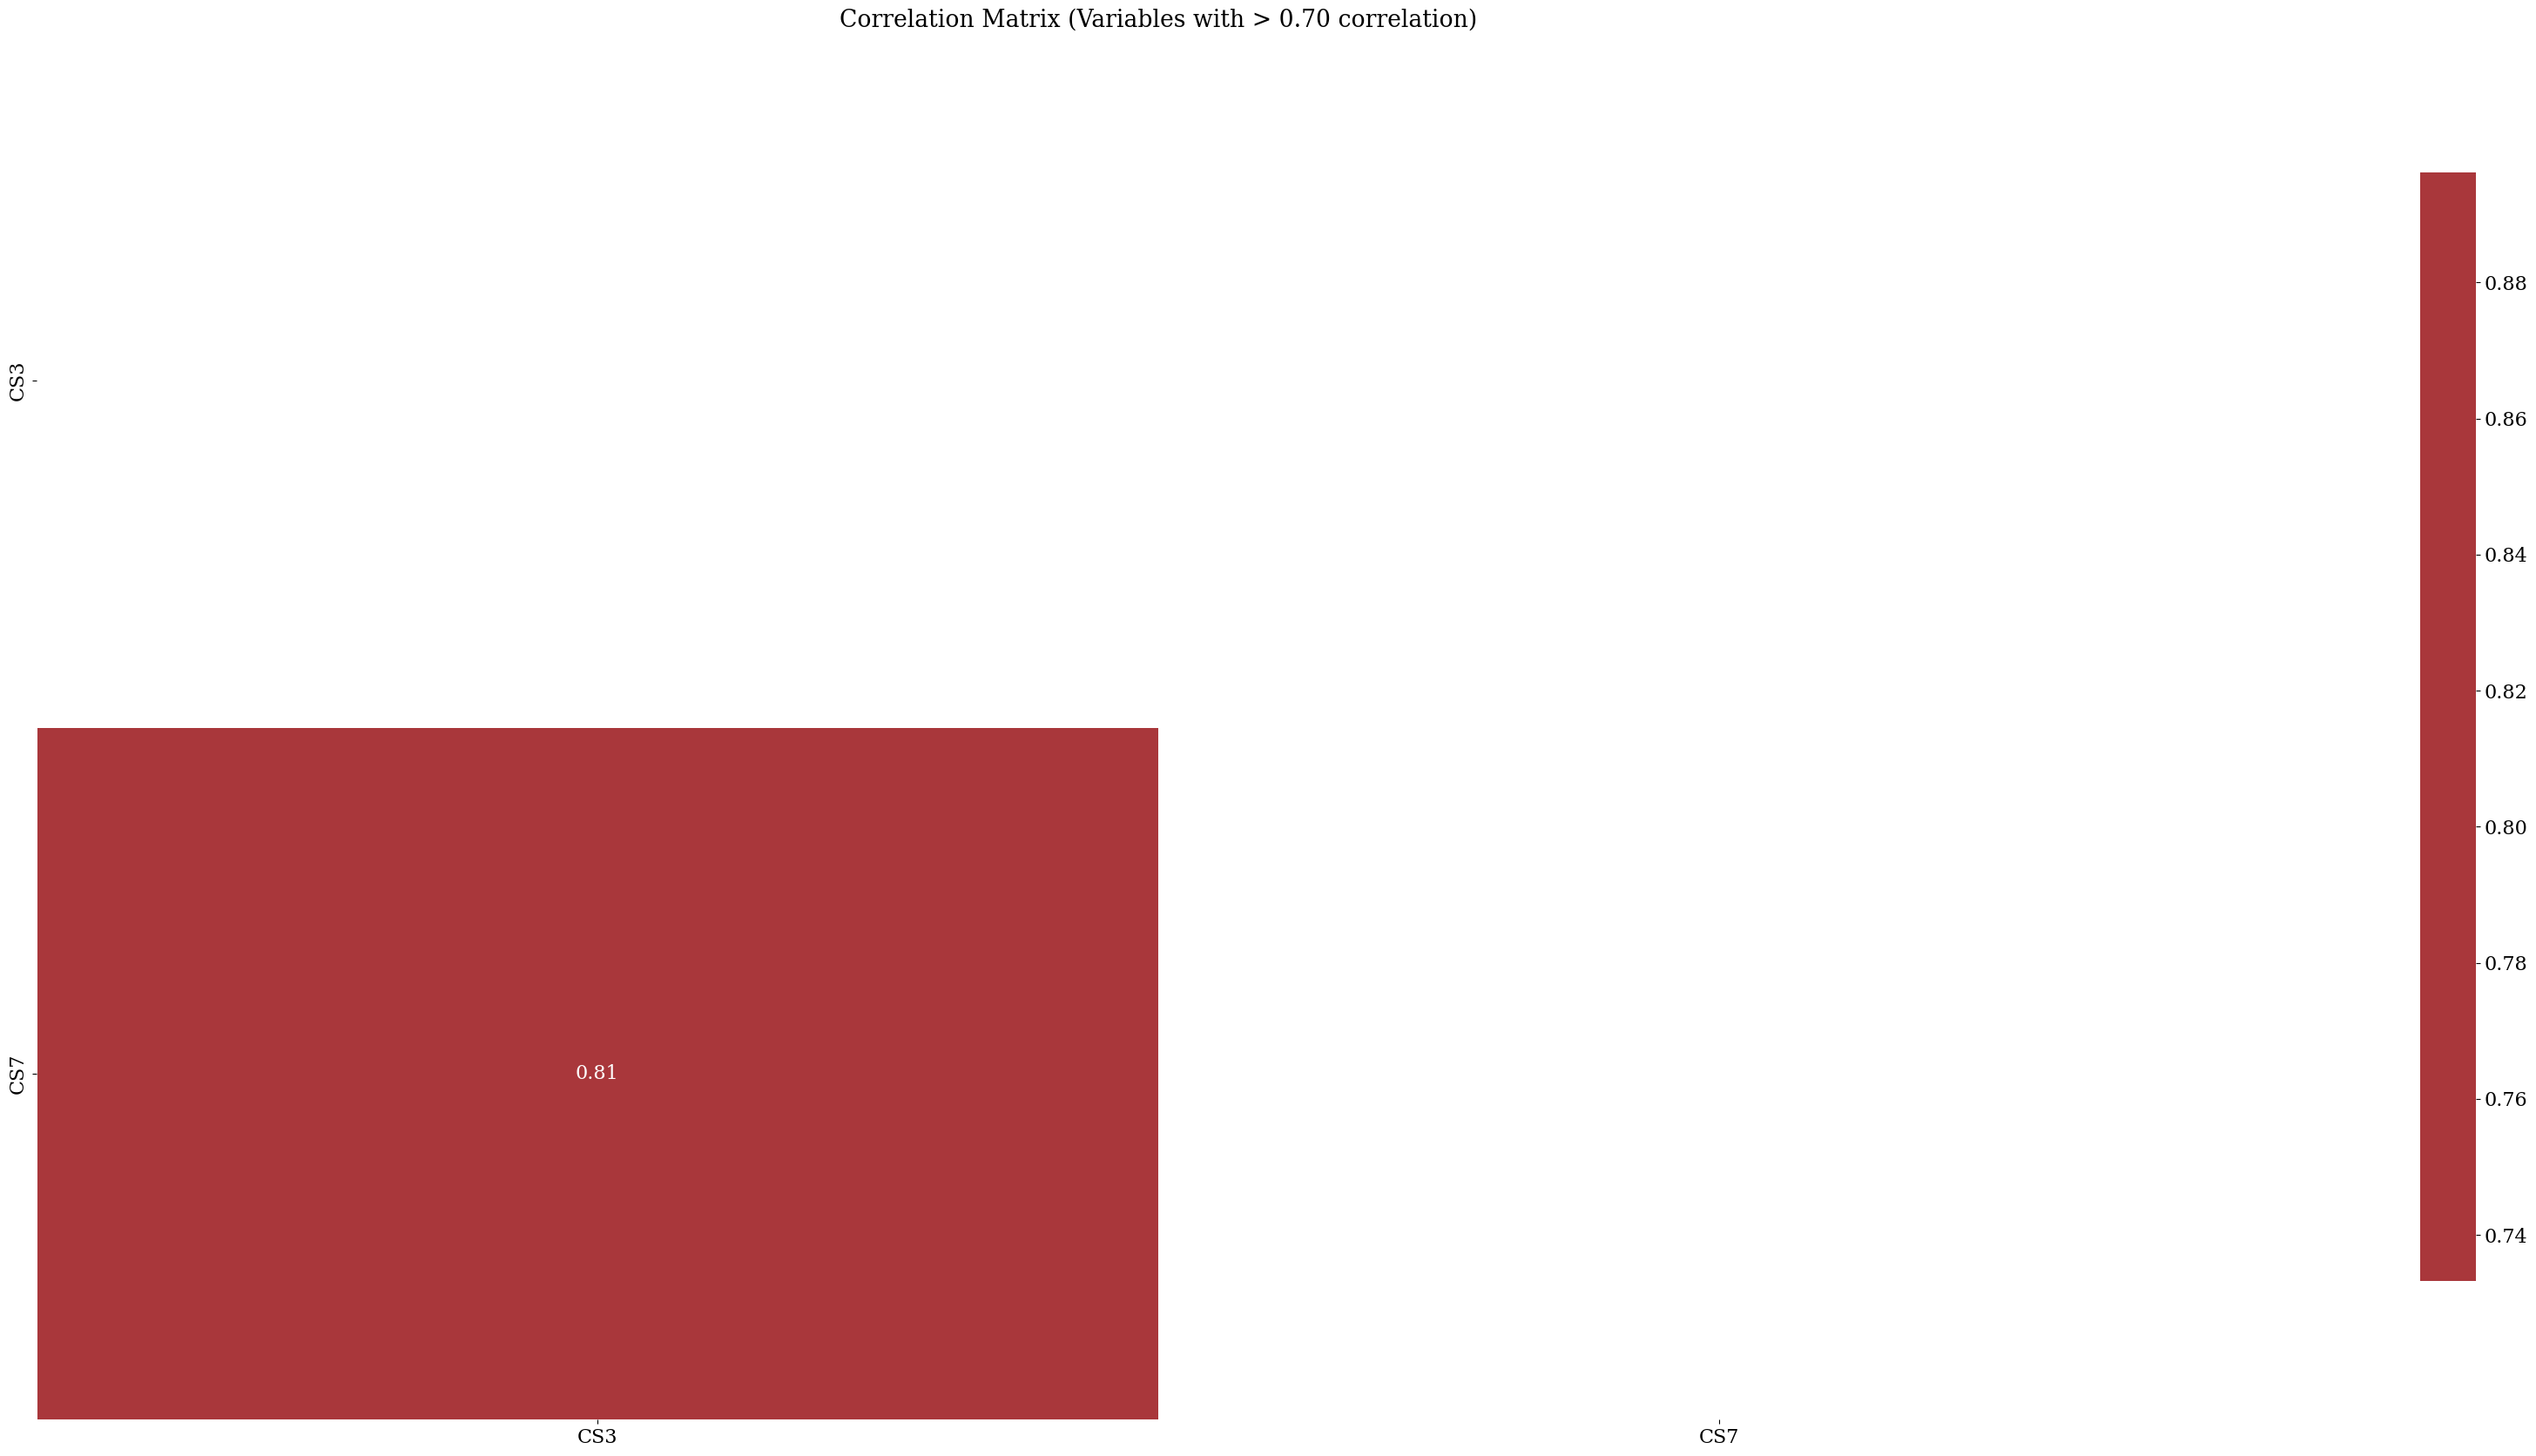

<IPython.core.display.Javascript object>

In [60]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="kendall"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [61]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="kendall")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS3  CS7    0.81466
dtype: float64

<IPython.core.display.Javascript object>

In [62]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.688077
CS3                   CS28    0.654095
#325                  CS28    0.570442
#200                  CS28    0.519061
SO3                   CS28    0.498291
Blaine                CS28    0.475698
Loss on Ignition      CS28    0.470304
Initial setting time  CS28    0.444844
Final setting time    CS28    0.436695
CaO                   CS28    0.353155
Na2O                  CS28    0.349470
K2O                   CS28    0.347728
CS1                   CS28    0.326470
Insoluble Residue     CS28    0.280142
SiO2                  CS28    0.230803
MgO                   CS28    0.186841
Al2O3                 CS28    0.150750
Fe2O3                 CS28    0.060137
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

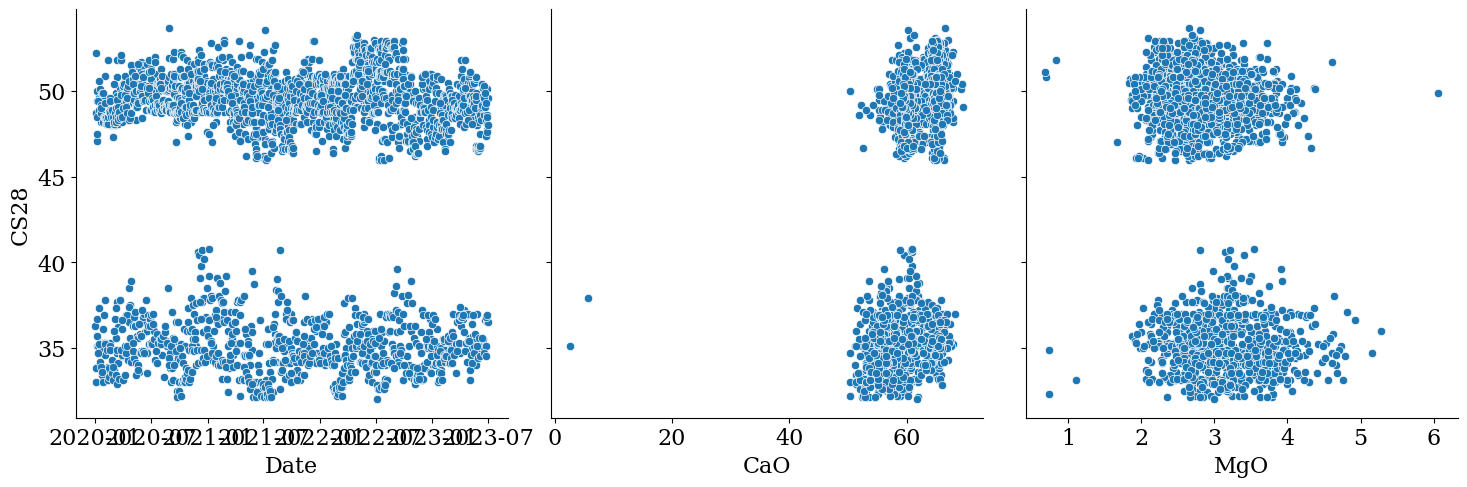

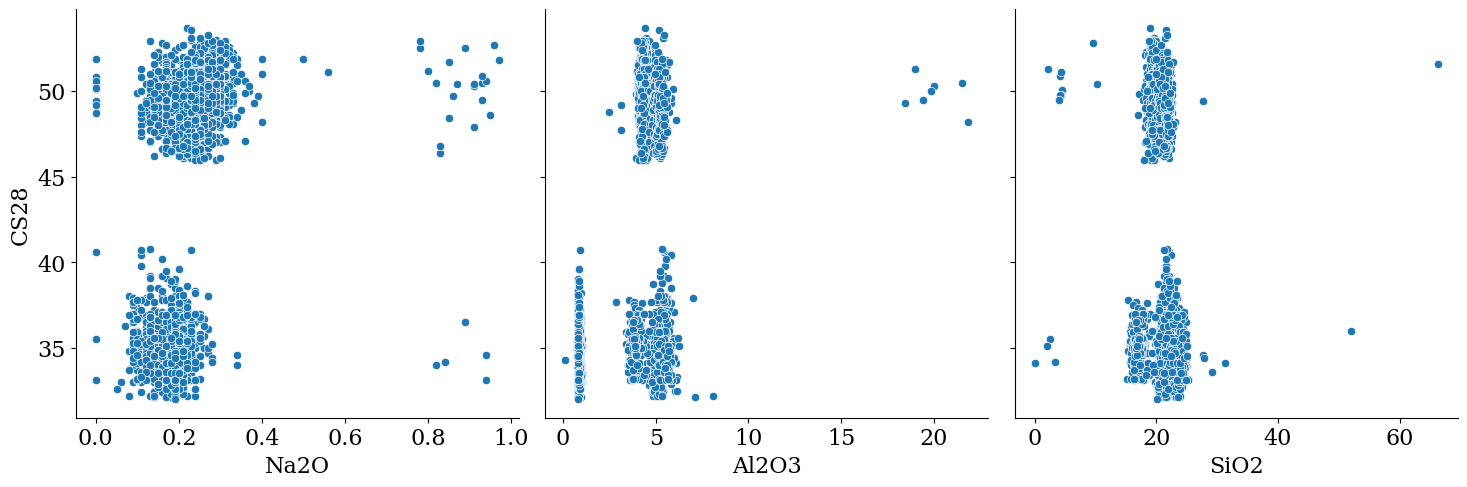

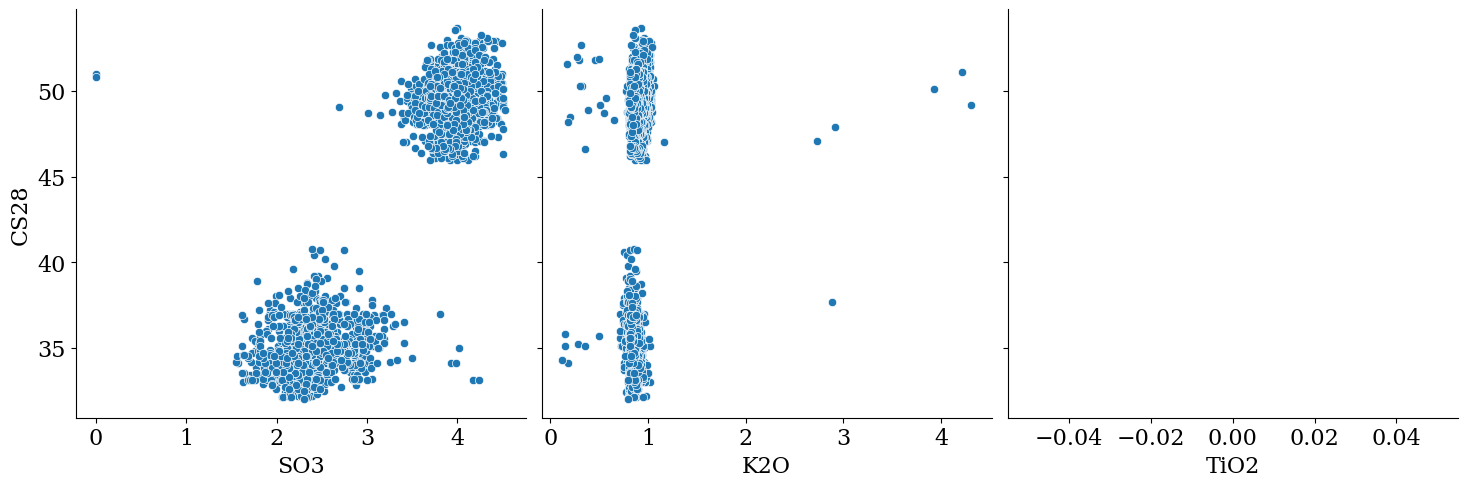

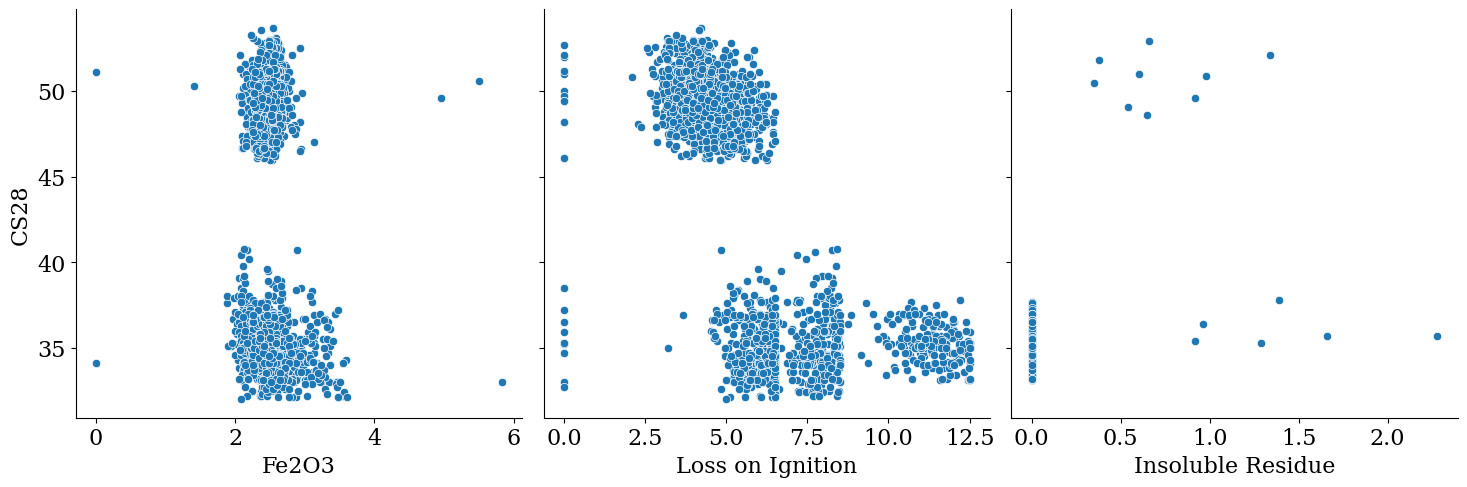

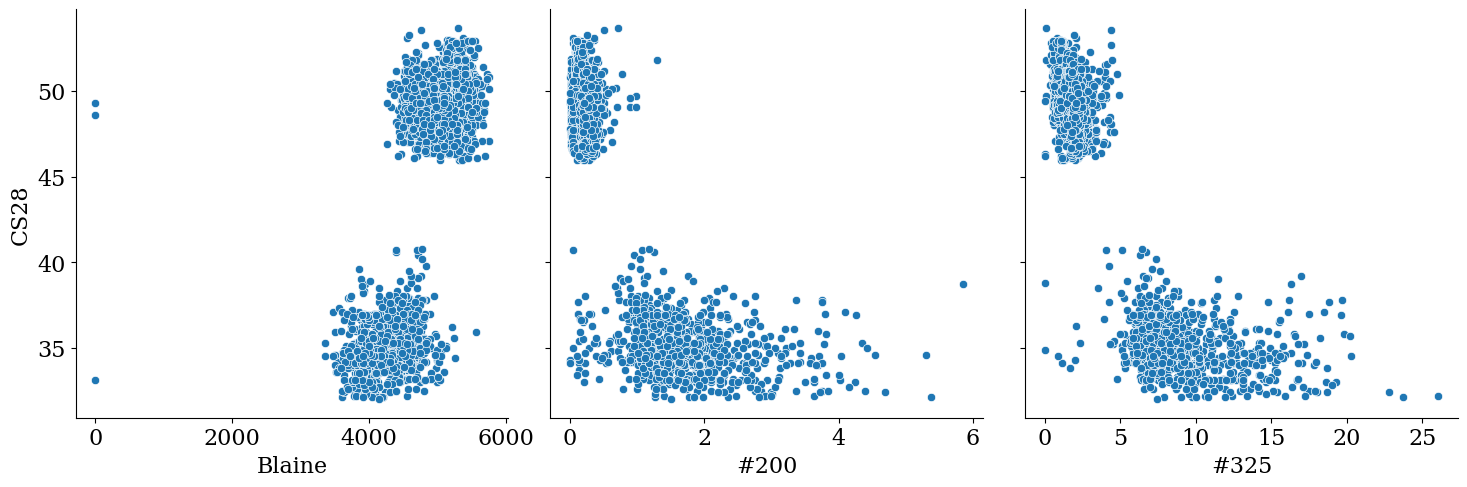

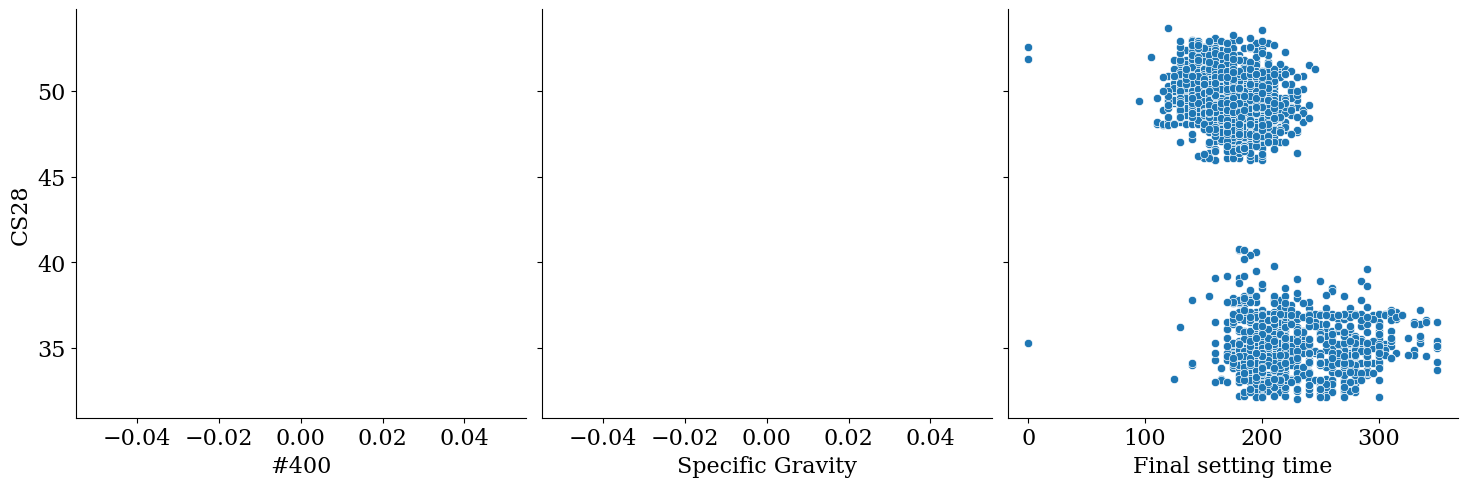

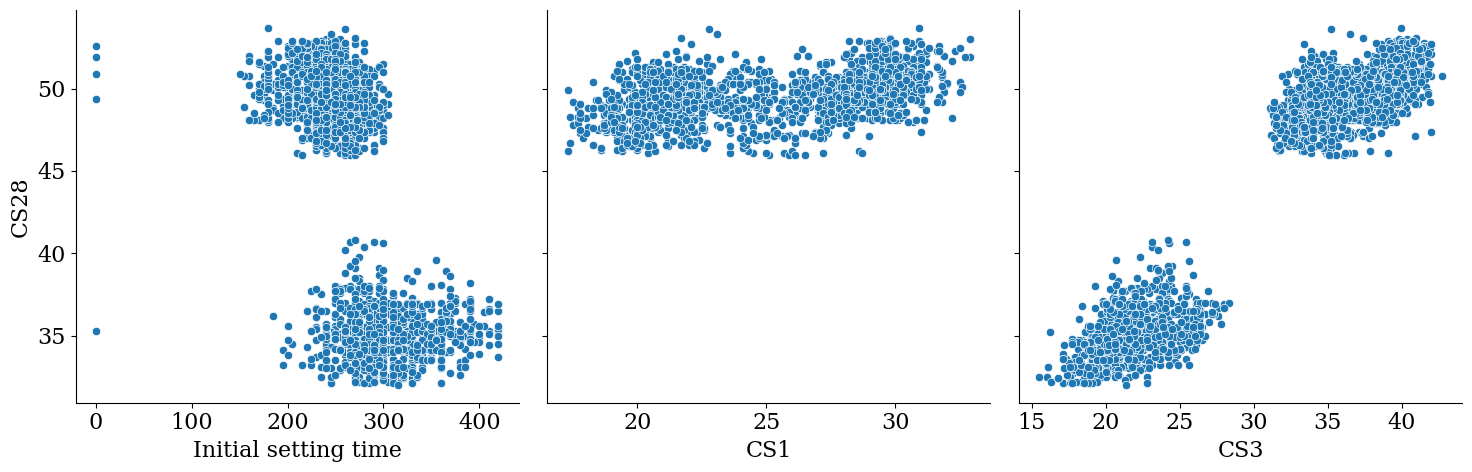

<IPython.core.display.Javascript object>

In [63]:
num_lines = 7
plots_per_line = 3

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [64]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

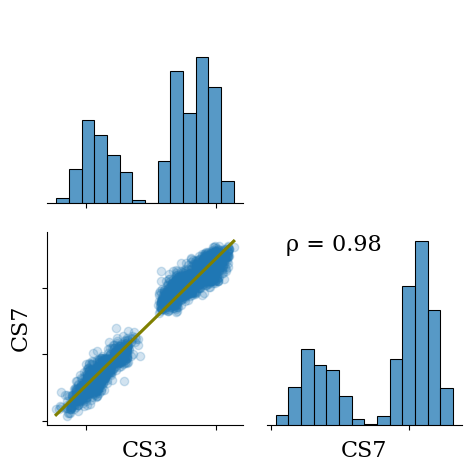

<IPython.core.display.Javascript object>

In [65]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [66]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

752 valid days out of 1062


<IPython.core.display.Javascript object>

In [67]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [68]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4, 5, 6, 7}}

<IPython.core.display.Javascript object>

In [69]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        22
      2        22
      3        27
      4        22
      5        21
      6        20
      7        24
      8        25
      9        24
      10       27
      11       27
      12       27
2021  1        23
      2        23
      3        29
      4        26
      5        27
      6        27
      7        26
      8        25
      9        25
      10       23
      11       27
      12       24
2022  1        24
      2        23
      3        27
      4        24
      5        26
      6        27
      7        27
      8        24
      9        24
      10       25
      11       26
      12       25
2023  1        25
      2        22
      3        26
      4        23
      5        25
      6        22
      7        24
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

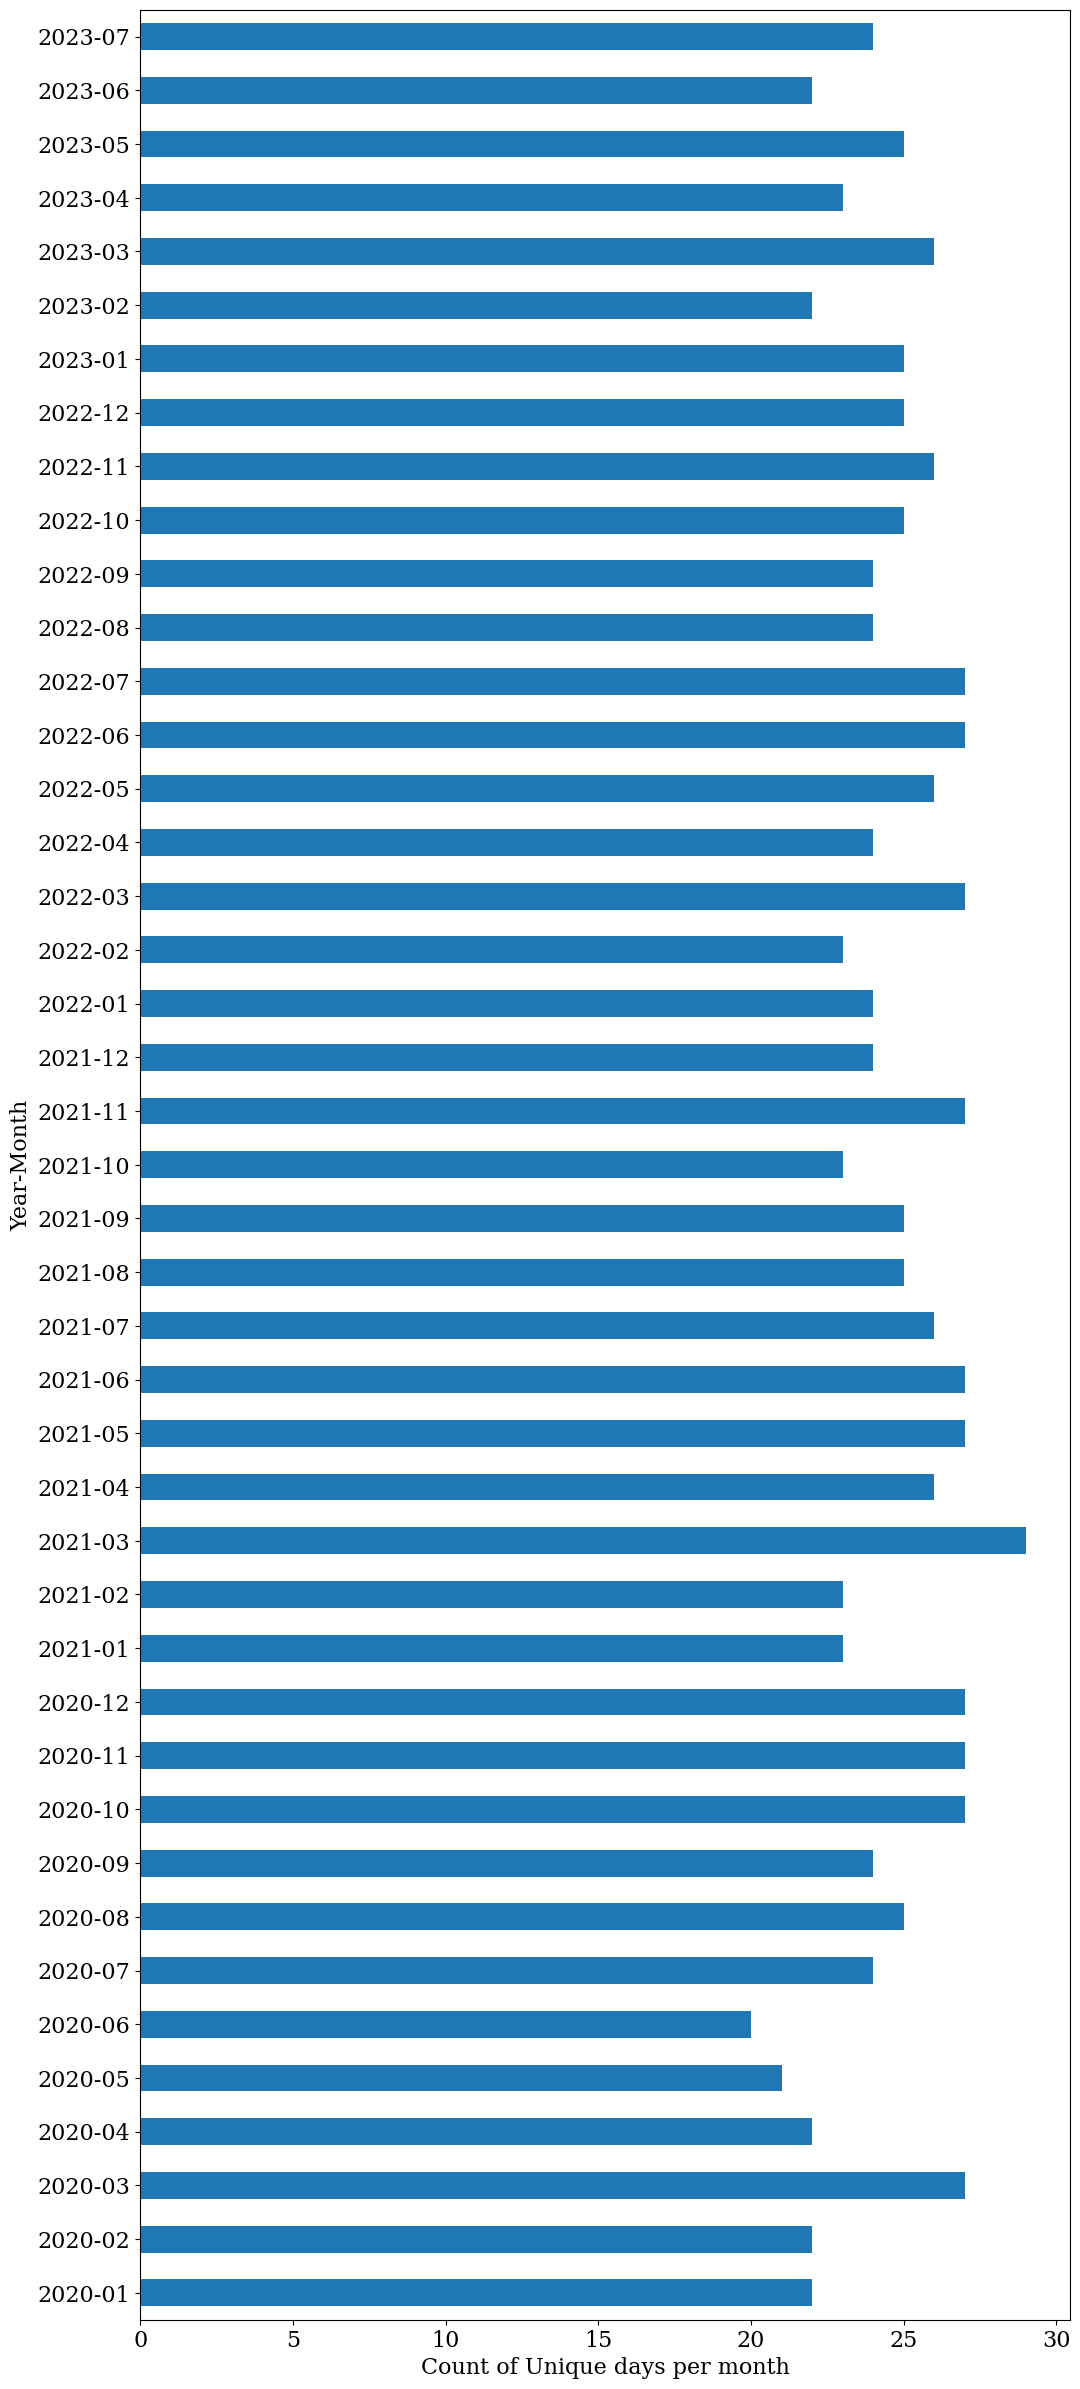

<IPython.core.display.Javascript object>

In [70]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [71]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        49
      2        52
      3        64
      4        48
      5        54
      6        49
      7        58
      8        55
      9        66
      10       72
      11       63
      12       69
2021  1        61
      2        56
      3        69
      4        55
      5        66
      6        67
      7        74
      8        76
      9        69
      10       68
      11       69
      12       55
2022  1        62
      2        63
      3        76
      4        66
      5        76
      6        78
      7        83
      8        72
      9        66
      10       60
      11       60
      12       55
2023  1        57
      2        48
      3        63
      4        50
      5        58
      6        54
      7        56
Name: size, dtype: int64


<IPython.core.display.Javascript object>

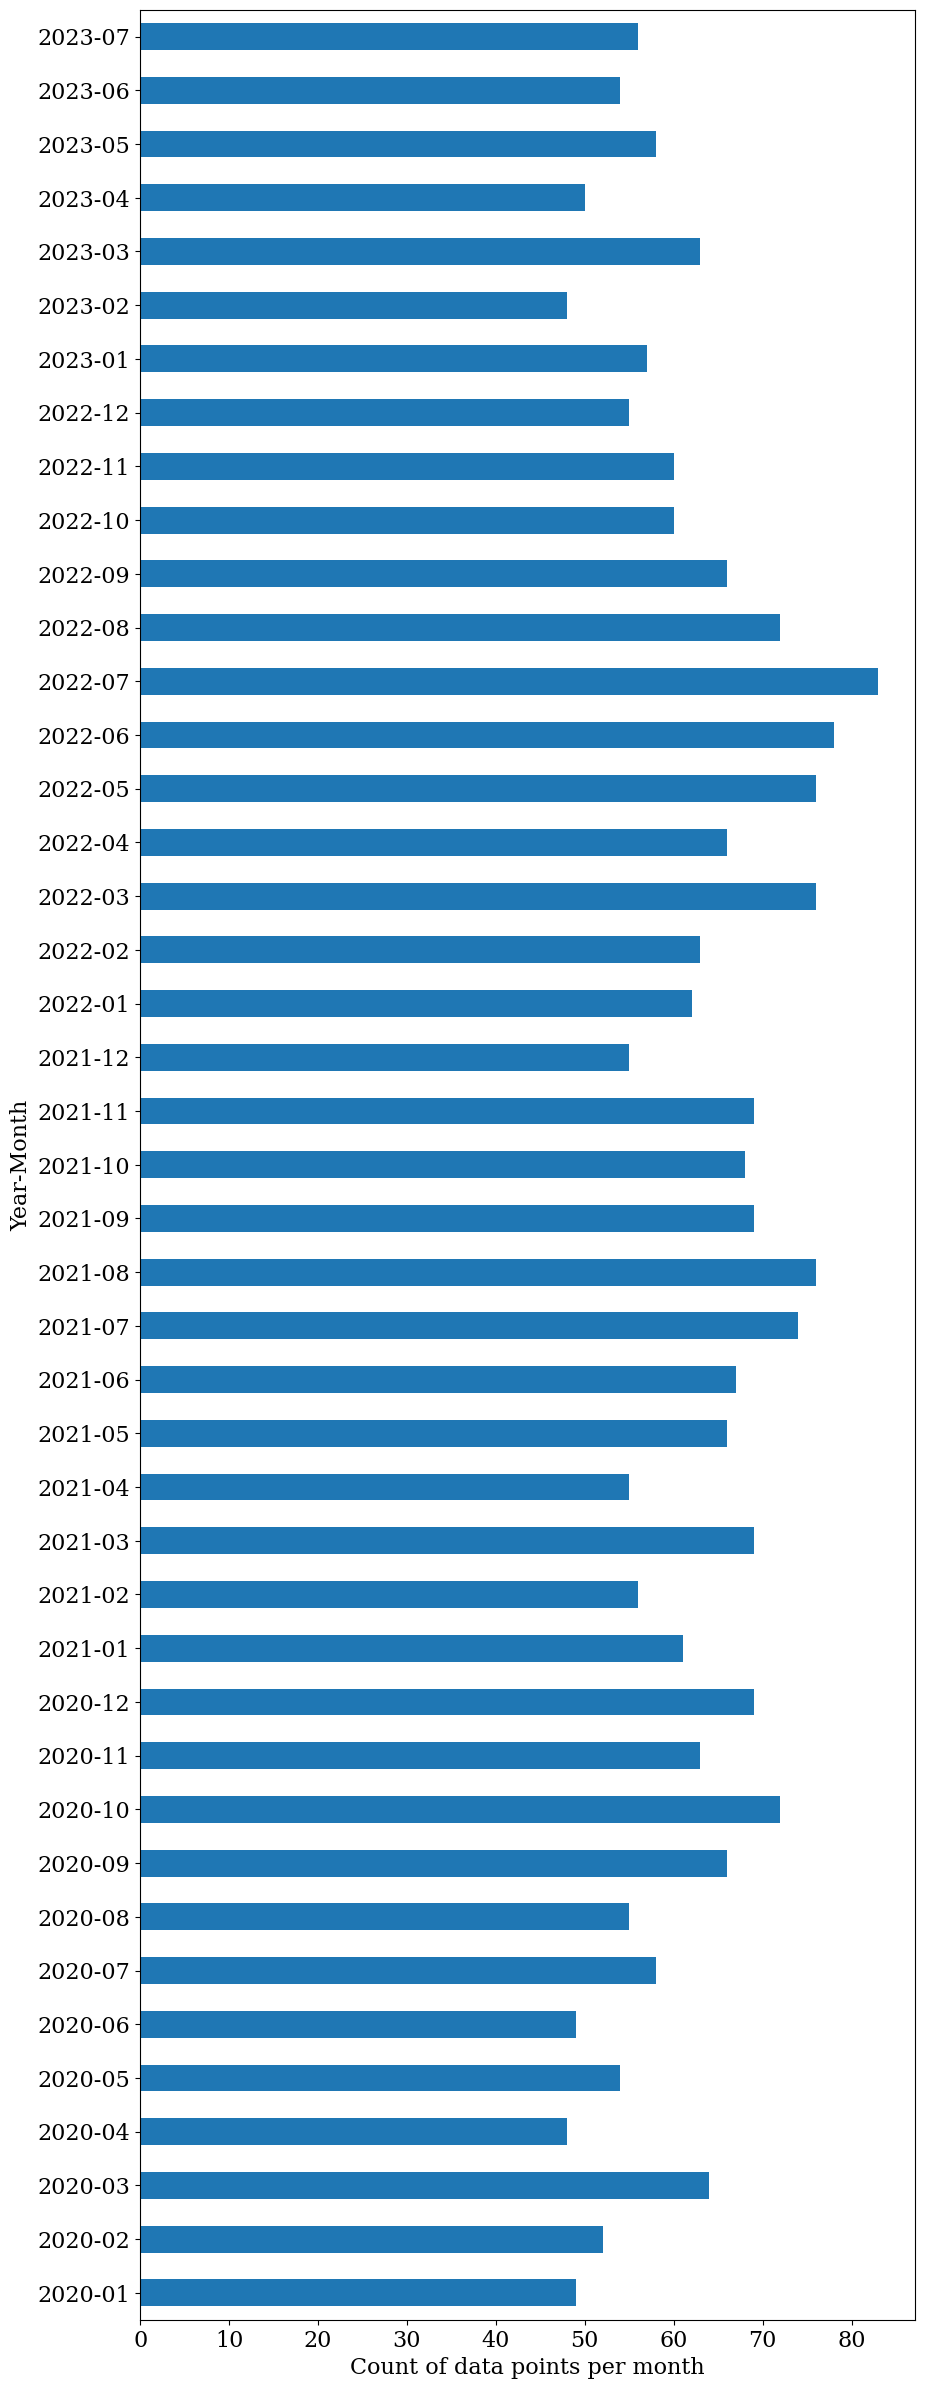

<IPython.core.display.Javascript object>

In [72]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [73]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2020-4 has the minimum number of days with samples - 48
2022-7 has the maximum number of days with samples - 83


<IPython.core.display.Javascript object>

In [74]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2020: 58, 2021: 65, 2022: 68, 2023: 55}

Mean number of observations - all years
62


<IPython.core.display.Javascript object>

In [75]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  1062.000000
mean      2.530132
std       1.096879
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       8.000000

<IPython.core.display.Javascript object>

In [76]:
day_counts[["DayCount"]].value_counts()

DayCount
3           375
2           290
1           217
4           148
5            24
6             4
7             3
8             1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [77]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
469  2021      8    1         8

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

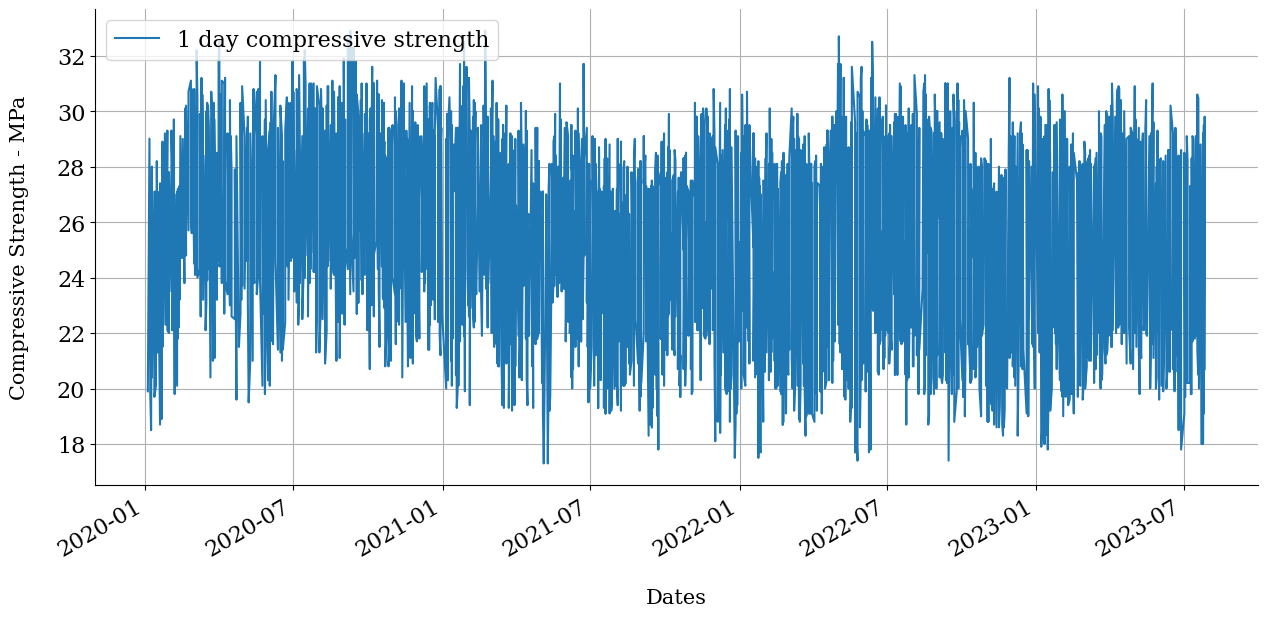

<IPython.core.display.Javascript object>

In [78]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

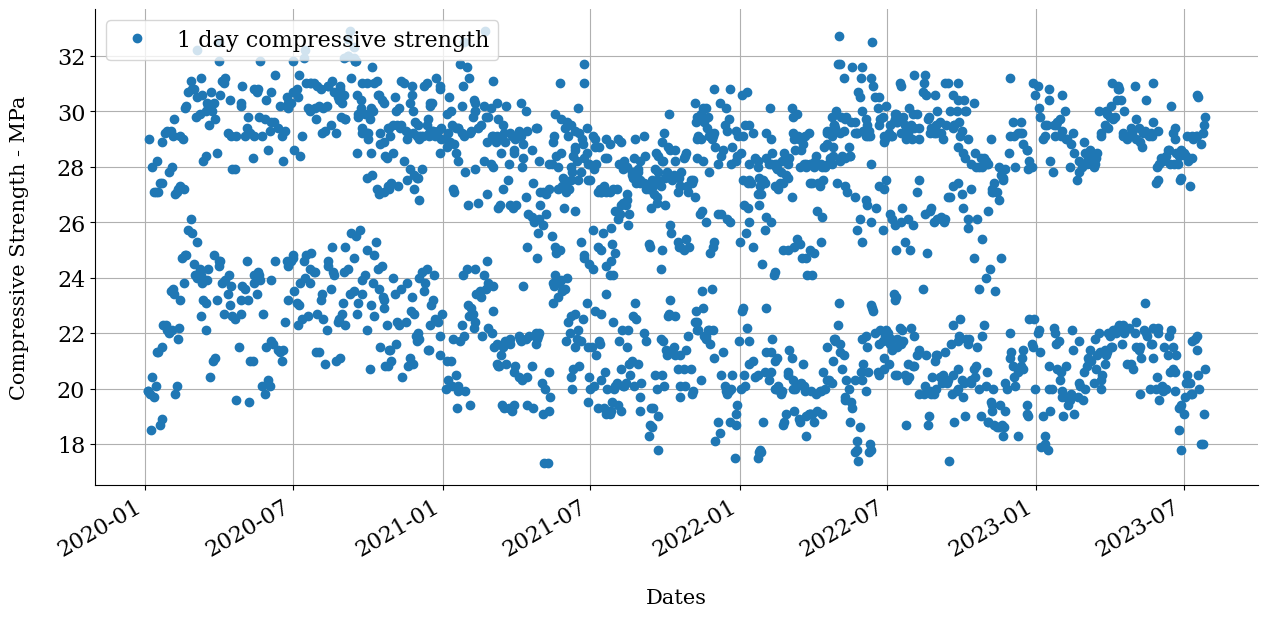

<IPython.core.display.Javascript object>

In [79]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

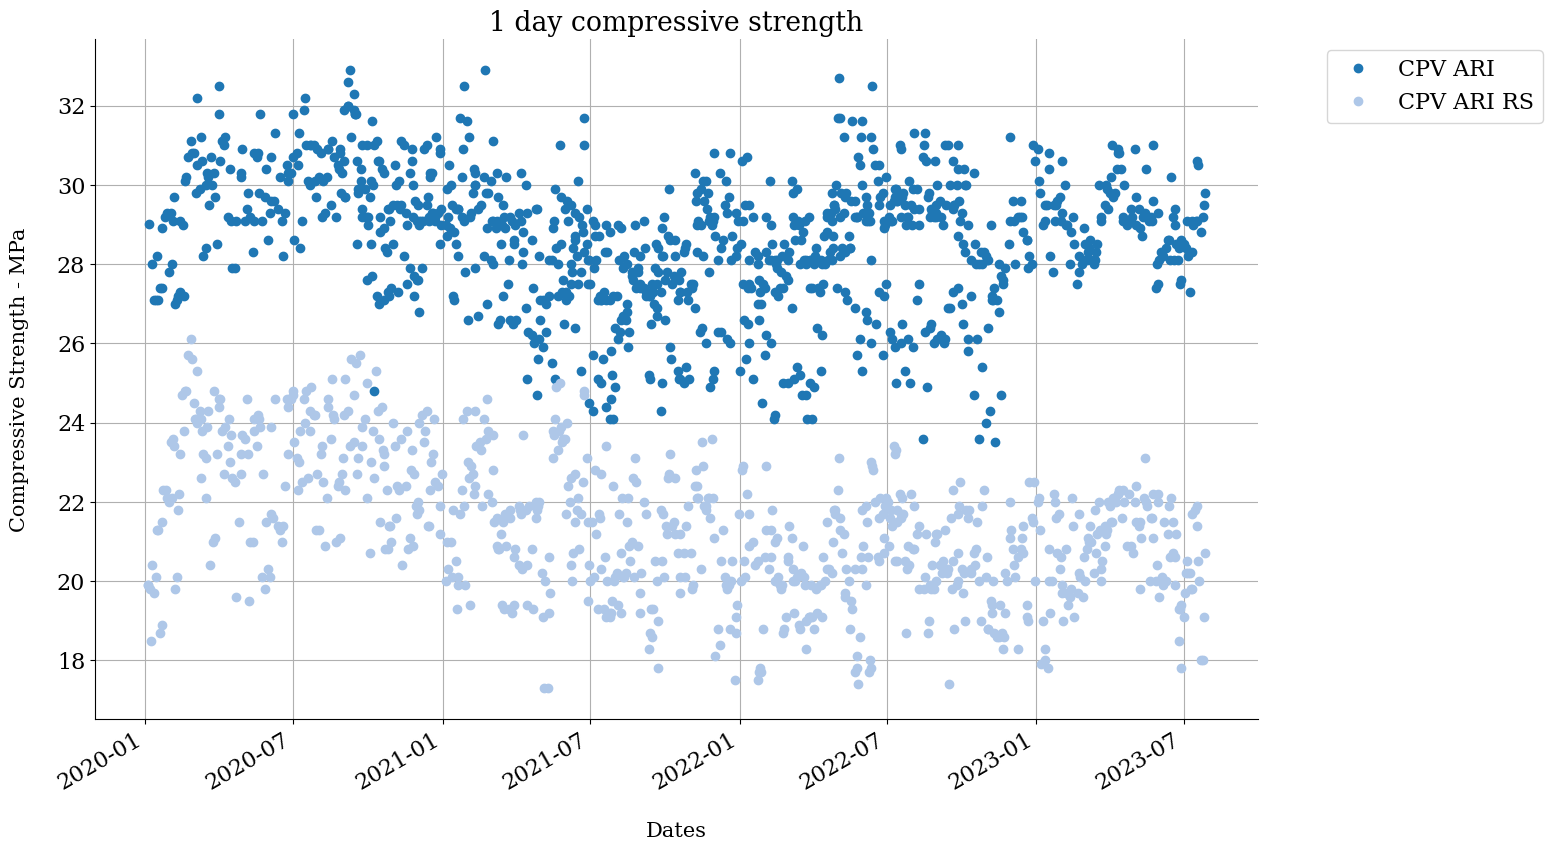

<IPython.core.display.Javascript object>

In [80]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()

#### 3 Days

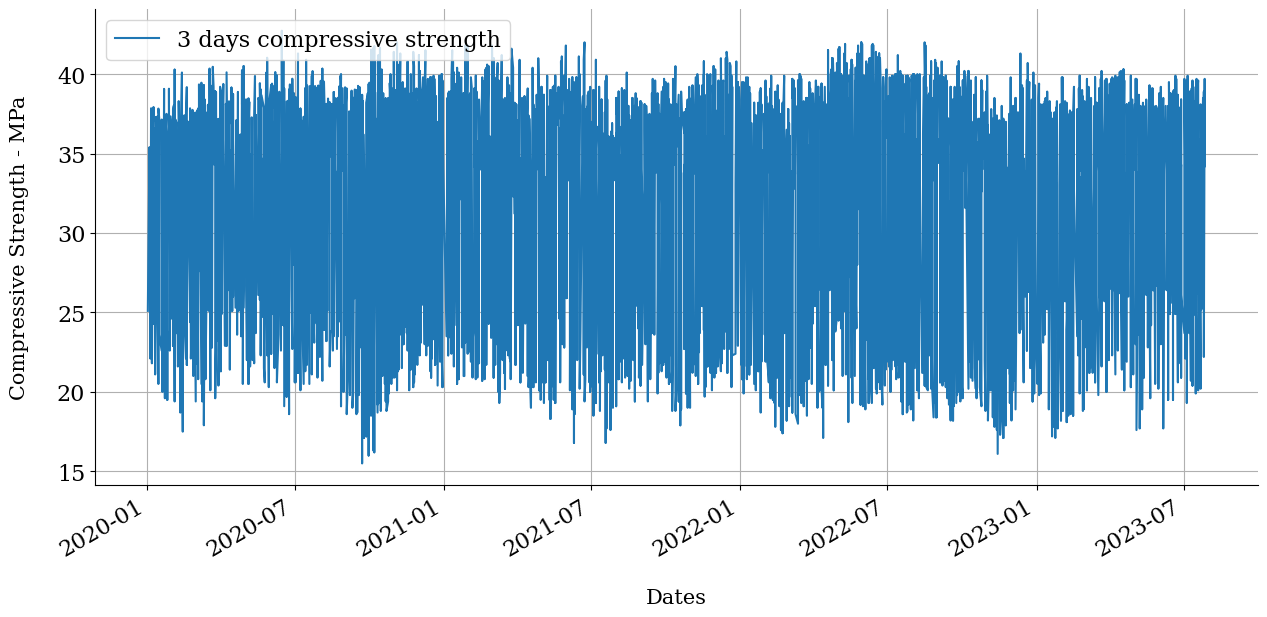

<IPython.core.display.Javascript object>

In [81]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

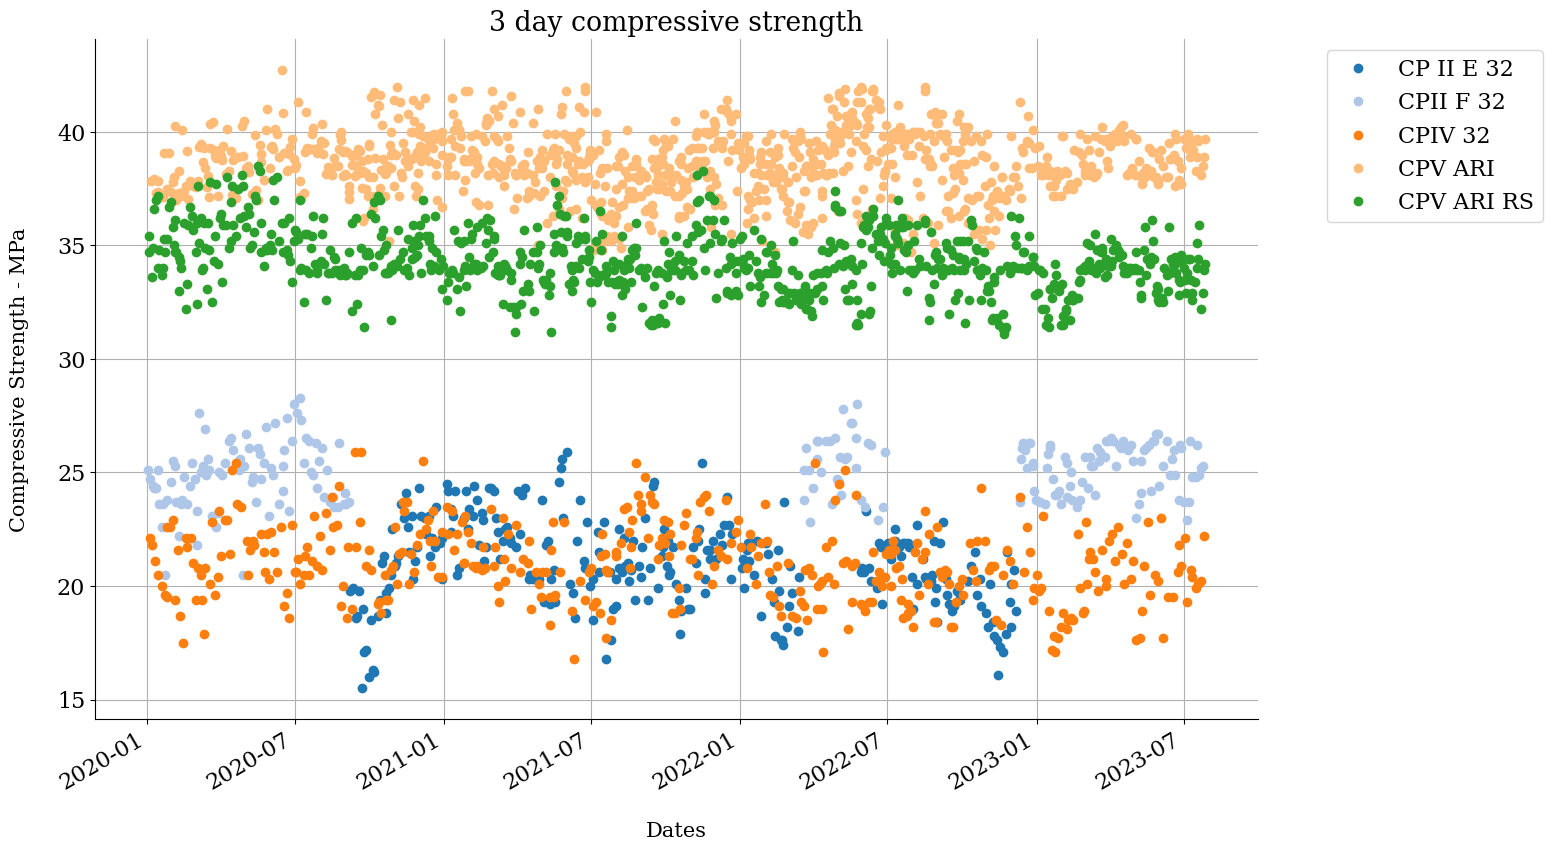

<IPython.core.display.Javascript object>

In [82]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

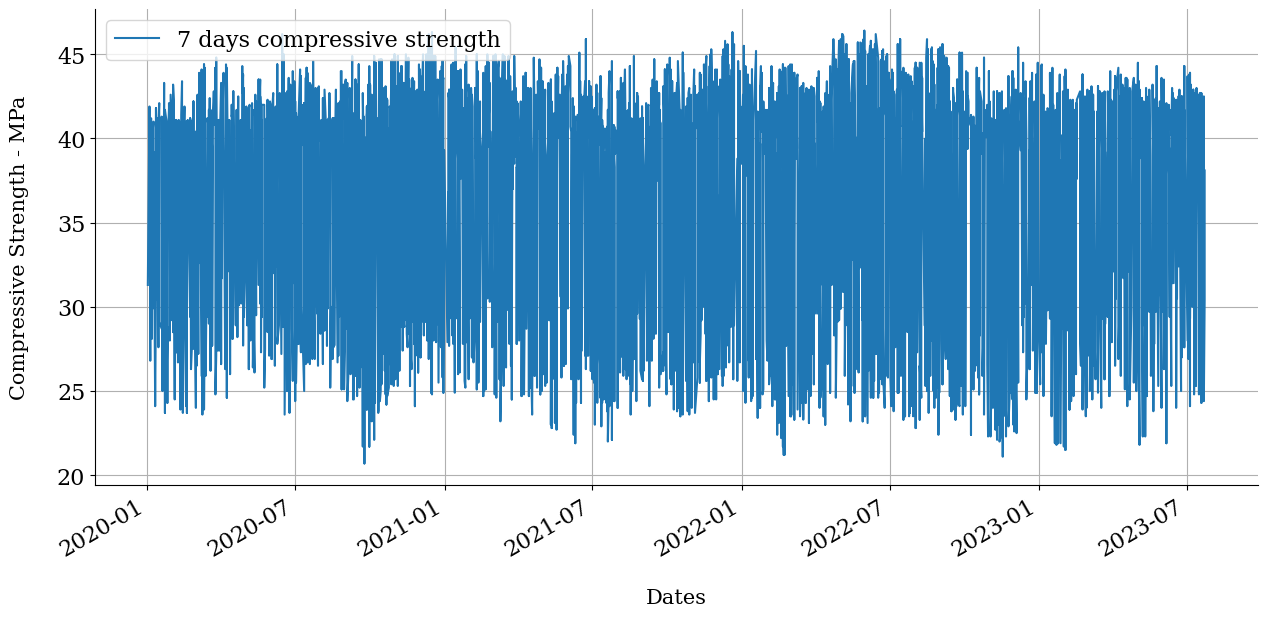

<IPython.core.display.Javascript object>

In [83]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

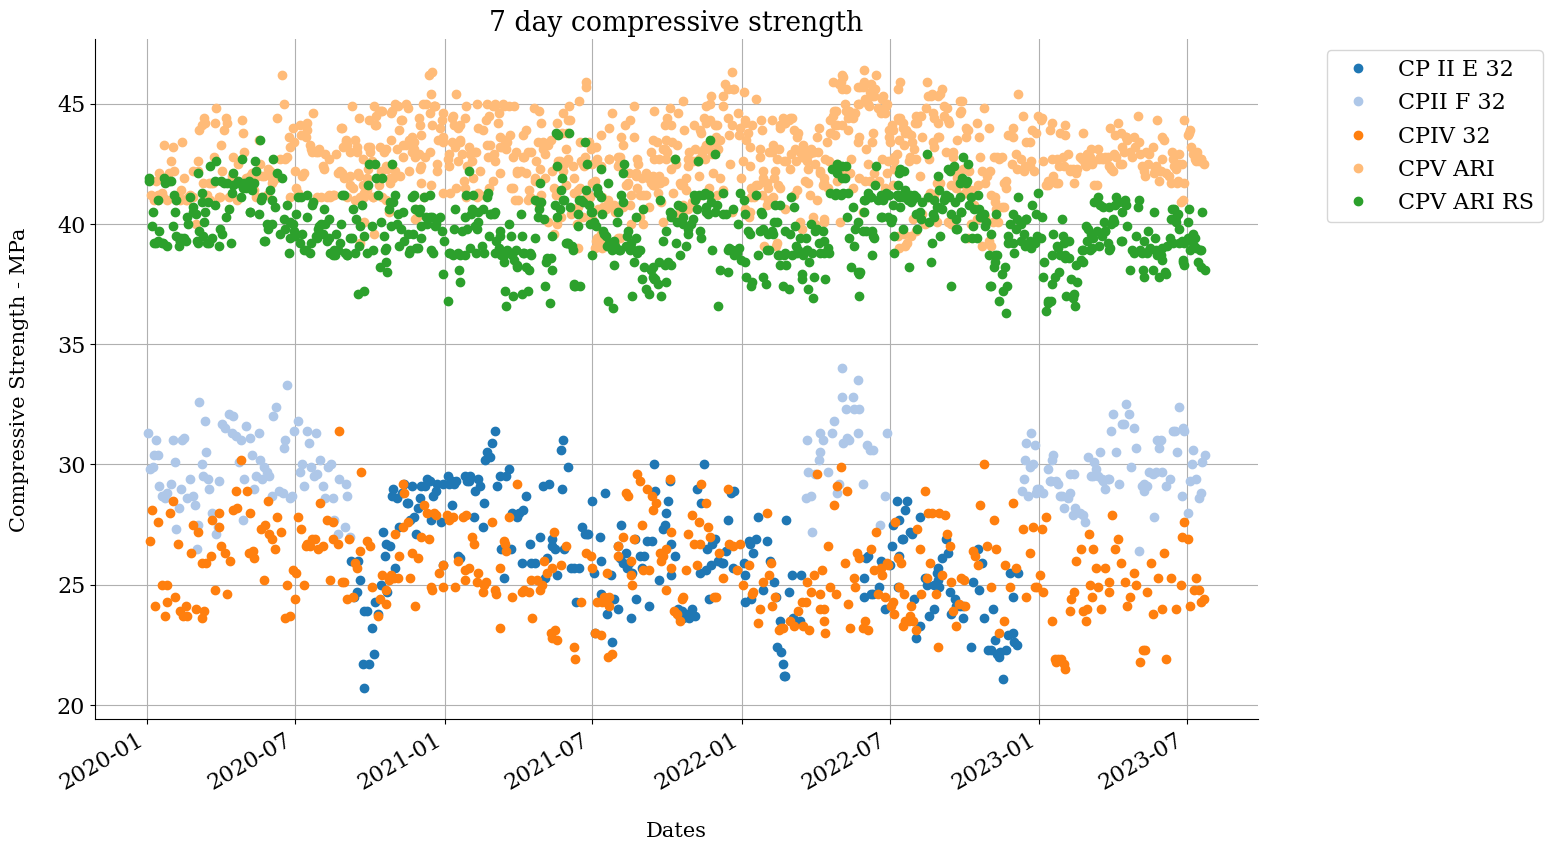

<IPython.core.display.Javascript object>

In [84]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

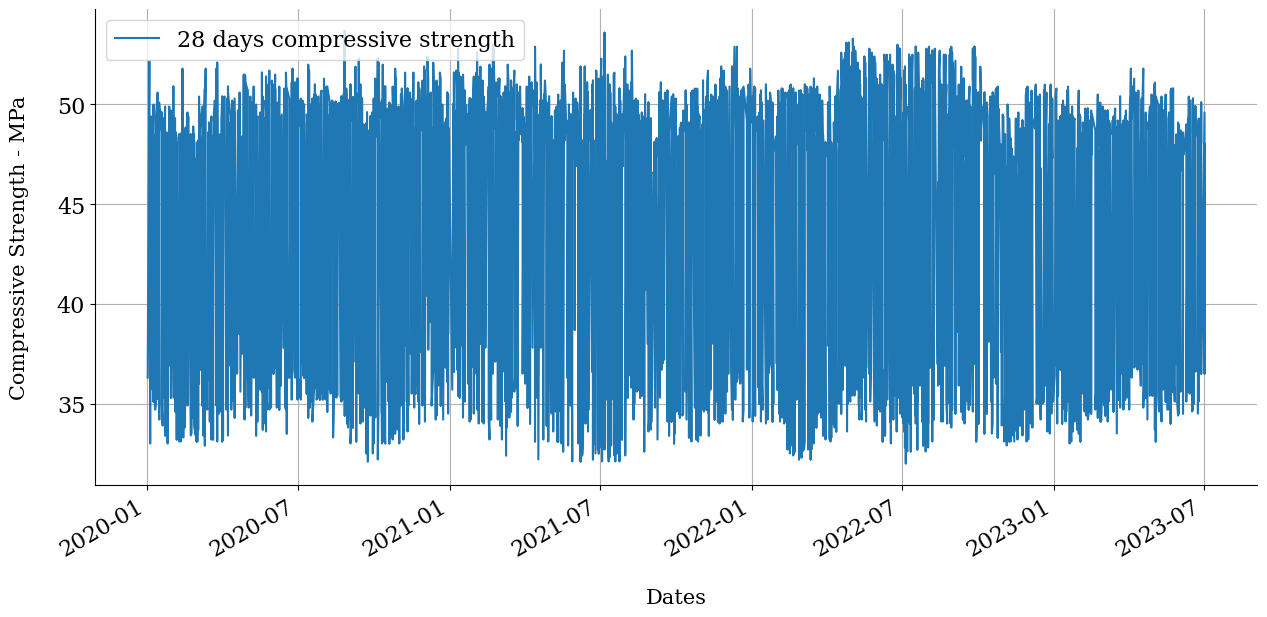

<IPython.core.display.Javascript object>

In [85]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

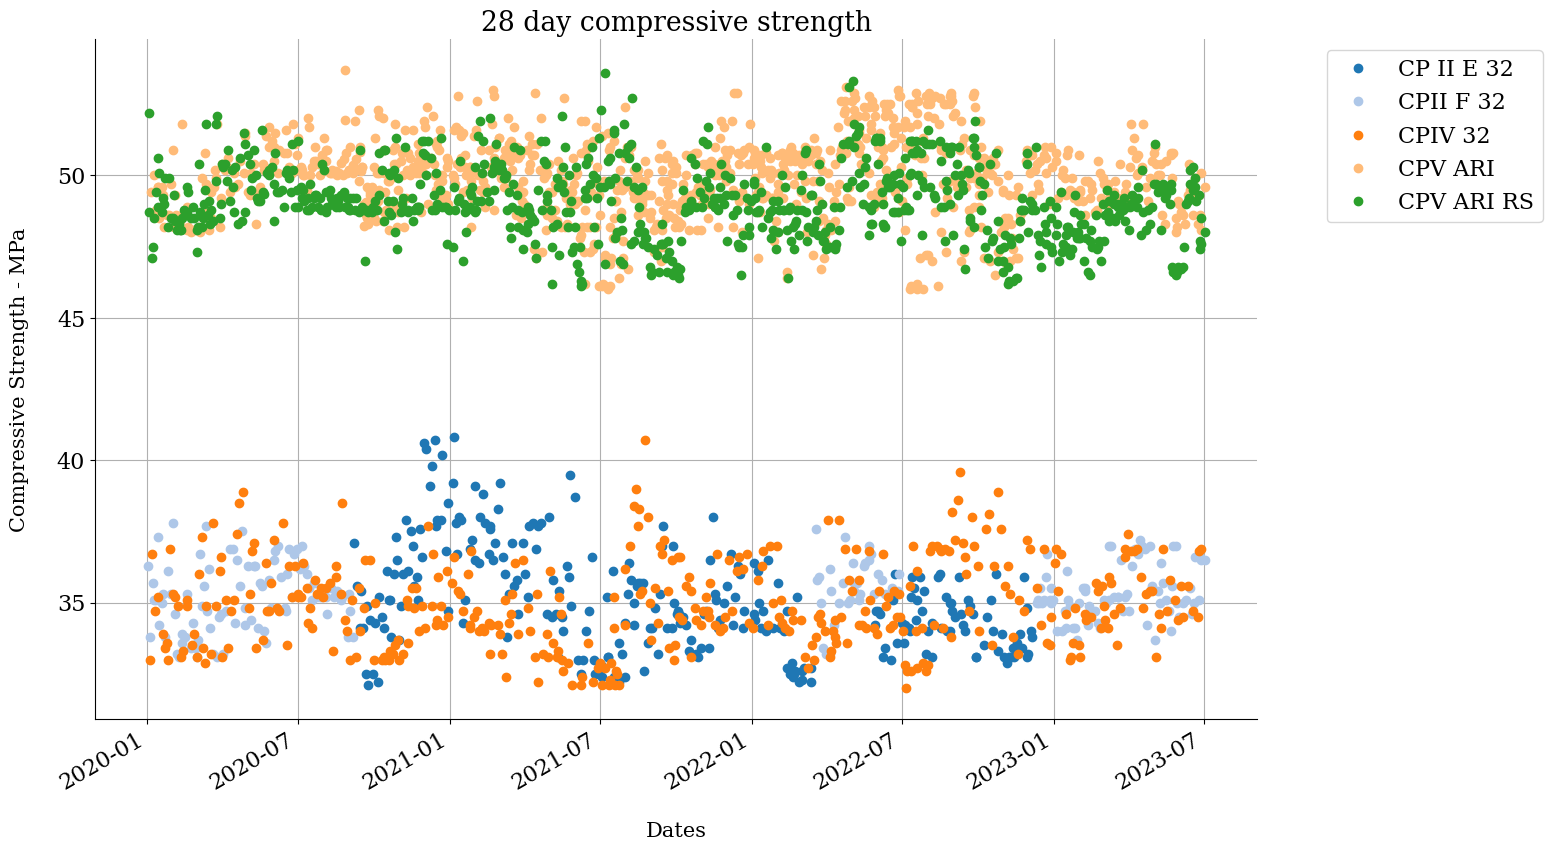

<IPython.core.display.Javascript object>

In [86]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()